# Part I - Ford Bike Dataset Exploration Title
## By Rellika Kisyula

## Introduction
The Ford GoBike dataset contains anonymized trip data for the bike-sharing system from June 2017 to April 2019. <p style="color:red"> **However, I decided to only use the data in the year 2018 (January 2018 to December 2018).**</p> The data includes information on individual bike rides such as trip duration, start and end time, start and end station, bike ID, and user type. Additionally, demographic data such as age, gender, and membership type is provided for some users.

- `duration_sec`: The duration of the bike ride in seconds
- `start_time`: The date and time the bike ride started
- `end_time`: The date and time the bike ride ended
- `start_station_id`: The ID number of the station where the ride started
- `start_station_name`: The name of the station where the ride started
- `start_station_latitude`: The latitude of the station where the ride started
- `start_station_longitude`: The longitude of the station where the ride started
- `end_station_id`: The ID number of the station where the ride ended
- `end_station_name`: The name of the station where the ride ended
- `end_station_latitude`: The latitude of the station where the ride ended
- `end_station_longitude`: The longitude of the station where the ride ended
- `bike_id`: The ID number of the bike used in the ride
- `user_type`: The type of user, either "Subscriber" (members with monthly or annual memberships) or "Customer" (casual riders who - `purchase` a single ride or day pass)
- `member_birth_year`: The birth year of the user (for subscribers only)
- `member_gender`: The gender of the user (for subscribers only)

These columns provide information on the duration and location of the bike ride, the bike and station used, and some demographic information on the users.

### Extra Packages
We will be calculating the distance between the start and end stations. To install this package, run the following command in the terminal:

`pip install haversine`

In [1]:
%pip install haversine


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Importing Packages

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# import the haversine package
from haversine import haversine

### Base Color
The base color for this project is `#1F77B4`.

In [3]:
base_color = sb.color_palette()[0]

### Downloading the Dataset
I manually downloaded the datasets from the [System Data | Bay Wheels | Lyft](https://www.lyft.com/bikes/bay-wheels/system-data) page. The datasets were in the form of a zip file. I extracted the zip files and saved the csv files in the `data` folder as this notebook. The zip files are in `data/zip_files` folder.

### Unzipping the Dataset
Imagine you have zip files stored in `./data/zip_files `with names like 201801-fordgobike-tripdata.csv.zip, 201802-fordgobike-tripdata.csv.zip, etc. You can use the following code to extract all the zip files into the `./data/data_files` folder.

In [4]:
# Unzip zip files in the data/zip_files folder into the data/data_files folder
import zipfile
import os

# create a list of all zip files in the zip_files folder
zip_files = os.listdir('./data/zip_files')

# loop through the list of zip files
for zip_file in zip_files:
    # create a full path to the zip file
    zip_path = './data/zip_files/' + zip_file
    # extract the zip file to the data folder
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('./data/data_files')

> **Note:** The code above is adapted from [How to unzip multiple files in a folder using Python?](https://stackoverflow.com/questions/3451111/unzipping-files-in-python)

> **Note:** The folder `data/data_files` is not included in the repository because it contains the extracted csv files. These csv files can be generated by running the code above.

### Combining the Datasets
I combined the datasets into one csv file by reading all the csv files in the `./data/data_files` folder into an individual pandas dataframe. I then saved the combined those individual dataframe into a csv file in the `data` folder as `bike_data.csv`.

In [5]:
# Read the data files from the data/data_files folder
january = pd.read_csv('./data/data_files/201801-fordgobike-tripdata.csv')
january.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
40135,1570,2018-01-20 15:19:13.0290,2018-01-20 15:45:23.2580,193,Grand Ave at Santa Clara Ave,37.812744,-122.247215,186,Lakeside Dr at 14th St,37.801319,-122.262642,3475,Subscriber,1987.0,Female,No
52908,381,2018-01-16 20:25:55.5880,2018-01-16 20:32:17.2260,182,19th Street BART Station,37.809013,-122.268247,196,Grand Ave at Perkins St,37.808894,-122.256460,3477,Subscriber,1986.0,Female,No
40240,484,2018-01-20 15:10:02.0280,2018-01-20 15:18:06.1850,7,Frank H Ogawa Plaza,37.804562,-122.271738,179,Telegraph Ave at 27th St,37.816073,-122.267886,2673,Subscriber,1980.0,Male,Yes
12490,1552,2018-01-29 08:55:26.1800,2018-01-29 09:21:18.7880,145,29th St at Church St,37.743684,-122.426806,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1068,Subscriber,1980.0,Male,No
92451,350,2018-01-02 09:38:22.3660,2018-01-02 09:44:12.9570,324,Union Square (Powell St at Post St),37.788300,-122.408531,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,3668,Subscriber,1986.0,Male,No


In [6]:
september = pd.read_csv('./data/data_files/201809-fordgobike-tripdata.csv')
september.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
49506,2040,2018-09-23 10:51:56.5990,2018-09-23 11:25:56.7880,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,1646,Subscriber,1968.0,Male,No
87990,838,2018-09-17 16:38:15.2530,2018-09-17 16:52:14.1830,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1056,Subscriber,1972.0,Male,No
17672,348,2018-09-27 18:13:36.0380,2018-09-27 18:19:24.5470,350.0,8th St at Brannan St,37.771431,-122.405787,49.0,S Park St at 3rd St,37.780760,-122.394989,3358,Customer,1979.0,Male,No
17464,829,2018-09-27 18:20:24.9930,2018-09-27 18:34:14.0470,251.0,California St at University Ave,37.870555,-122.279720,244.0,Shattuck Ave at Hearst Ave,37.873748,-122.268648,3028,Subscriber,1993.0,Male,No
154120,1280,2018-09-06 21:38:27.9980,2018-09-06 21:59:48.9640,78.0,Folsom St at 9th St,37.773717,-122.411647,105.0,16th St at Prosper St,37.764285,-122.431804,2644,Subscriber,1987.0,Female,Yes


<font style="color:red">**Instead of reading the data files one by one, we can use a for loop to read all the files**</font>

In [7]:
# create a list of all data files in the data_files folder
data_files = os.listdir('./data/data_files')

In [8]:
# Function to loop through the data files and read them into a dataframe
def read_data_files( data_files):
    # create an empty list to store the dataframes
    dataframe_list = []
    # loop through the list of data files
    for data_file in data_files:
        # ignore if it is not a csv file
        if data_file[-3:] != 'csv':
            continue
        # create a full path to the data file
        data_path = './data/data_files/' + data_file
        # read the data file and append it to the list of dataframes
        dataframe_list.append(pd.read_csv(data_path))
    # return the list of dataframes
    return dataframe_list

In [9]:
dataframes = read_data_files(data_files)
# concatenate the dataframes into one dataframe
bike_data = pd.concat(dataframes, ignore_index=True)

In [10]:
bike_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1267154,448,2018-08-25 13:48:18.5770,2018-08-25 13:55:47.5120,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2025,Customer,1998.0,Female,No
1771867,113,2018-04-23 17:07:25.9330,2018-04-23 17:09:19.3930,64.0,5th St at Brannan St,37.776754,-122.399018,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,774,Subscriber,1983.0,Male,No
1607743,934,2018-10-02 18:53:50.3960,2018-10-02 19:09:24.6740,73.0,Pierce St at Haight St,37.771793,-122.433708,16.0,Steuart St at Market St,37.794130,-122.394430,4324,Subscriber,1990.0,Male,No
1206760,1077,2018-07-04 22:29:47.2840,2018-07-04 22:47:44.5170,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,720,Customer,1994.0,Male,No
1539946,313,2018-10-12 18:17:50.4570,2018-10-12 18:23:03.7000,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,121.0,Mission Playground,37.759210,-122.421339,3062,Subscriber,1984.0,Male,No


In [11]:
bike_data.shape

(1863721, 16)

> To confirm if all the rows of each dataset was added onto the dataframe, lets check the number of rows in the combined dataframe and the sum of the number of rows in each individual dataframe.

In [12]:
number_of_rows = []
# Loop through the list of dataframes and print the shape of each dataframe
for dataframe in dataframes:
    print(dataframe.shape)
    number_of_rows.append(dataframe.shape[0])
print(number_of_rows)
# Confirm that sum of the number of rows in each dataframe is equal to the number of rows in the concatenated dataframe
sum(number_of_rows) == bike_data.shape[0]

(106718, 16)
(134135, 16)
(186217, 16)
(195968, 16)
(179125, 16)
(131363, 16)
(94802, 16)
(199222, 16)
(192162, 16)
(201458, 16)
(111382, 16)
(131169, 16)
[106718, 134135, 186217, 195968, 179125, 131363, 94802, 199222, 192162, 201458, 111382, 131169]


True

## Data Preparation

**The following are the changes made to the dataset before saving it:**
1. Get the distance travelled from the coordinates using `haversine` package
2. Get the age of the users from the `member_birth_year` column
3. Extract the hour, day, month and year from the `start_time`

### 1: Calcultate distance travelled using the `haversine` package
I decided to find the distance the riders rode. I used the Haversine formula to calculate the distance between the start and end points of the ride.

In [13]:
# Create a new column `distance` which is the distance between the start and end station
bike_data['distance'] = bike_data.apply(lambda x: haversine((x['start_station_latitude'], x['start_station_longitude']),
                                                                    (x['end_station_latitude'], x['end_station_longitude'])), axis=1)   

### 2: Calculate the age of the users

In [14]:
# Create a new column `member_age` which is the difference between the 2018 and `member_birth_year`
bike_data['member_age'] = 2018 - bike_data.member_birth_year
# Select the column member_birth_year and member_age
bike_data[['member_birth_year', 'member_age']].sample(10)

,member_birth_year,member_age
1435023,1986.0,32.0
1423155,1978.0,40.0
595063,1977.0,41.0
147380,1990.0,28.0
15032,1983.0,35.0
1423772,1983.0,35.0
1641358,1988.0,30.0
973857,1993.0,25.0
326931,1977.0,41.0
676258,1988.0,30.0


### Extract the hour, day, month and year from the `start_time` column

In [15]:
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])
# Extract the month name from the start_time column
bike_data['month_of_year'] = bike_data['start_time'].dt.strftime('%B')

# Extract the day of the week from the start_time column
bike_data['day_of_week'] = bike_data['start_time'].dt.strftime('%A')

# Extract the hour from the start_time column
bike_data['hour'] = bike_data['start_time'].dt.strftime('%H')

In [16]:
# Select the columns start_time, month, day_of_week, hour
bike_data[['start_time', 'month_of_year', 'day_of_week', 'hour']].sample(10)

,start_time,month_of_year,day_of_week,hour
437233,2018-06-29 08:34:20.773,June,Friday,08
528920,2018-06-15 12:48:45.124,June,Friday,12
1229123,2018-08-31 17:14:12.407,August,Friday,17
1649728,2018-03-25 18:23:05.482,March,Sunday,18
1218786,2018-07-02 18:43:28.254,July,Monday,18
841030,2018-12-19 17:12:07.154,December,Wednesday,17
527777,2018-06-15 16:28:44.061,June,Friday,16
96383,2018-02-03 13:14:56.890,February,Saturday,13
618206,2018-06-01 17:40:02.348,June,Friday,17
584271,2018-06-06 22:00:23.834,June,Wednesday,22


In [17]:
# Using the `month_of_year` column, perform a value count
bike_data.month_of_year.value_counts()

October      201458
July         199222
June         195968
August       192162
September    186217
May          179125
November     134135
December     131363
April        131169
March        111382
February     106718
January       94802
Name: month_of_year, dtype: int64

### Creating period of day (`period_of_day`) column from the `hour` column

As mentioned above, I want to get the period of the day, that is either **Early Morning**, **Morning**, **Afternoon**, **Evening**, **Night**, **Late Night**, **Midnight**. I will use the `start_time` column to extract the hour of the day and then categorize it into the above periods.  

In [18]:
# Using the hour, generate a new column `period_of_day` which is the period of the day
# Early Morning: 3am - 6am, Morning: 6am - 12pm, Afternoon: 12pm - 3pm, Evening: 3pm - 6pm, Night: 6pm - 9pm, Late Night: 9pm - 12am, Midnight: 12am - 3am
bike_data['period_of_day'] = bike_data['hour'].apply(lambda x: 'Early Morning' if 3 <= int(x) < 6 else 'Morning' if 6 <= int(x) < 12 else 'Afternoon' if 12 <= int(x) < 15 else 'Evening' if 15 <= int(x) < 18 else 'Night' if 18 <= int(x) < 21 else 'Late Night' if 21 <= int(x) < 24 else 'Midnight')

In [19]:
# Select the columns start_time, hour, period_of_day
bike_data[['start_time', 'hour', 'period_of_day']].sample(10)

,start_time,hour,period_of_day
1508529,2018-10-17 19:11:00.126,19,Night
1219224,2018-07-02 18:11:27.517,18,Night
1786551,2018-04-19 18:35:27.581,18,Night
166591,2018-11-14 06:56:18.901,06,Morning
1260694,2018-08-27 08:16:49.245,08,Morning
573530,2018-06-08 14:20:49.367,14,Afternoon
1253652,2018-08-28 08:41:03.884,08,Morning
1617356,2018-10-01 15:00:36.339,15,Evening
1508588,2018-10-17 19:04:44.449,19,Night
1330545,2018-08-15 09:02:52.110,09,Morning


In [20]:
# Use the period_of_day and perform a value count
bike_data.period_of_day.value_counts()

Morning          669598
Evening          459806
Night            341831
Afternoon        261127
Late Night        96657
Midnight          19815
Early Morning     14887
Name: period_of_day, dtype: int64

### Saving the `bike_data` dataframe to csv file.
I saved the combined dataframe as `bike_data.csv` in the `data` folder.
```python
# Save the combined dataframe as bike_data.csv in the data folder
bike_data.to_csv('data/bike_data.csv', index=False)
```

In [21]:
# Save the combined dataframe as bike_data.csv in the data folder
bike_data.to_csv('data/bike_data.csv', index=False)

> <font style="color:red"> **Note:** The **file** `data/bike_data.csv` is not included in the repository. The `bike_data.csv` file can be generated by running the code above.</font>

## Preliminary Wrangling

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [22]:
# Read the bike_data.csv file into a dataframe
combined_bike_data = pd.read_csv('data/bike_data.csv')
combined_bike_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,member_age,month_of_year,day_of_week,hour,period_of_day
1231274,2675,2018-08-31 11:24:46.659,2018-08-31 12:09:22.6340,77.0,11th St at Natoma St,37.773507,-122.416040,14.0,Clay St at Battery St,37.795001,...,Customer,1988.0,Male,No,2.776100,30.0,August,Friday,11,Morning
8174,536,2018-02-27 08:12:39.992,2018-02-27 08:21:36.8300,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,81.0,Berry St at 4th St,37.775880,...,Subscriber,1982.0,Male,No,2.171537,36.0,February,Tuesday,8,Morning
1310768,431,2018-08-18 09:57:10.970,2018-08-18 10:04:22.7610,271.0,San Pablo Park,37.855783,-122.283127,241.0,Ashby BART Station,37.852477,...,Subscriber,1973.0,Male,No,1.191899,45.0,August,Saturday,9,Morning
770504,1411,2018-05-06 15:31:20.274,2018-05-06 15:54:51.9120,72.0,Page St at Scott St,37.772406,-122.435650,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Subscriber,1982.0,Female,No,4.449675,36.0,May,Sunday,15,Evening
1508289,351,2018-10-17 19:57:02.204,2018-10-17 20:02:53.8040,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,61.0,Howard St at 8th St,37.776513,...,Subscriber,1987.0,Male,No,1.305494,31.0,October,Wednesday,19,Night


### What is the structure of your dataset?

In [23]:
# Check the shape of the data
combined_bike_data.shape

(1863721, 22)

In [24]:
# Get general information about the dataframe, including the number of non-null values in each column
combined_bike_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  member_birth_year        1753003 non-null 

> I have observed the following properties about the dataset:
- The `start_time`, `end_time` are of object type, I will convert them to datetime type so it will be possible to perform analysis
- The dataset contains some missing values in the `start_station_id`, `start_station_name`, `end_station_id`,  and `end_station_name` columns. I will drop the rows with missing values.

In [25]:
# View descriptive statistics for numeric variables
combined_bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance,member_age,hour
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06,1.863721e+06,1.753003e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03,1.590931e+00,3.491204e+01,1.351437e+01
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01,1.028364e+00,1.044289e+01,4.742223e+00
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03,0.000000e+00,1.800000e+01,0.000000e+00
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03,8.675446e-01,2.700000e+01,9.000000e+00
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03,1.374592e+00,3.300000e+01,1.400000e+01
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03,2.087456e+00,4.000000e+01,1.700000e+01
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03,6.530934e+01,1.370000e+02,2.300000e+01


> The dataset contains 1863721 rows and 16 columns. In the **data preparation** section, I added 6 more columns name `member_age`, `distance`, `hour`, `period_of_day`, `day_of_week` and `month_of_year`. The features are described above.
> - **trip duration**: This includes columns for the duration of the bike ride in seconds, the date and time the bike ride started, and the date and time the bike ride ended.
> - **start station**: This includes columns for the ID number of the station where the ride started, the name of the station where the ride started, and the latitude and longitude of the station where the ride started.
> - **end station**: This includes columns for the ID number of the station where the ride ended, the name of the station where the ride ended, and the latitude and longitude of the station where the ride ended.
> - **bike**: This includes columns for the ID number of the bike used in the ride.
> - **customer data**: This includes information such as if the person who rented the bike was a customer or subscriber. It also states information of the person who rented such as date of birth, gender, age, and membership type.

### What is/are the main feature(s) of interest in your dataset?
> 1. Based on the Ford GoBike dataset, I can explore when and where most trips are taken as the dataset includes information on the start time and location of each ride. This information can help me identify popular starting points and times for the bike-sharing system. I will start by analyzing the `start_station_name`. I will then use `start_station_latitude` and `start_station_longitude` columns to calculate the distance of travel. Doing so, I will be able to get a better understanding of when and where the most trips originate.

> 2. In addition to identifying popular starting points and times, I am also interested in exploring the characteristics of the riders such as age, sex, and user type. This can be done by analyzing the `member_birth_year`, `member_gender`, and `user_type` columns. Understanding the demographics of the riders can help me identify patterns in bike usage and preferences.

> 3. I am also interested in exploring the time of the day, that is either **morning**, **afternoon**, **evening** or **night**.  Understanding the time of the day can help me identify patterns in bike usage and preferences. Moreover, I want to explore the day of the week and month of the year. Understanding the day of the week and month of the year can help me identify patterns in bike usage and preferences.

> 4.  Finally, I plan to analyze the duration of the trips for each starting point and time. This information can help me understand how long riders typically use the bikes for and whether there are any patterns or trends in trip duration based on the starting location or time. Overall, I am looking forward to exploring this dataset and gaining insights into the usage patterns of the Ford GoBike system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> To observe the points mentioned above, we can use the following features of the Ford GoBike dataset:
> 1. To identify the popular starting points and times, we can use the start_time, start_station_id, start_station_name, start_station_latitude, and start_station_longitude columns.
> 2. To explore the characteristics of the riders, we can use the member_birth_year, member_gender, and user_type columns.
> 3. To explore the time of the day, the day of the week and month of the year, we can `hour`, `period_of_day`, `day_of_week`, `month_of_year` columns we extracted from the `start_time` column in our **data perparation phase**.
> 4. To analyze the duration of the trips for each starting point and time, we can use the duration_sec column, as well as the start_time and start_station_id columns to match up each ride's duration with its starting point and time.
>
> By examining these features of the dataset, we can gain insights into when and where most trips are taken, the characteristics of the riders, and the duration of the trips for each starting point and time. These insights can help us understand usage patterns and preferences, and identify opportunities for improving the Ford GoBike system.

> #### Expectations before univariate, bivariate, and multivariate exploration
> 1. I expect that the most popular starting points and times will be in the morning and afternoon, and that the most popular starting points will be near the city center.
> 2. I expect that young riders will be more that the older riders who are subscribers
> 3. Comparing the subscribers and customers, I expect that the subscribers will be more than the customers.
> 4. Concerning the genders, I expect that males will be more frequent riders than the female riders

## Data Wrangling

### Data Assessment

In [26]:
# Lets see the top 5 rows
combined_bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,member_age,month_of_year,day_of_week,hour,period_of_day
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,Subscriber,1988.0,Male,No,2.272573,30.0,February,Wednesday,23,Late Night
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,Customer,1987.0,Male,No,1.889595,31.0,February,Wednesday,23,Late Night
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1986.0,Female,No,2.790685,32.0,February,Wednesday,18,Night
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,1981.0,Male,No,2.790685,37.0,February,Wednesday,18,Night
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,Subscriber,1976.0,Female,Yes,1.630600,42.0,February,Wednesday,23,Late Night


In [27]:
# Lets see the last 10 columns
combined_bike_data.tail(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,member_age,month_of_year,day_of_week,hour,period_of_day
1863716,887,2018-04-01 00:00:08.163,2018-04-01 00:14:55.5710,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,215.0,34th St at Telegraph Ave,37.822547,...,Subscriber,1988.0,Male,Yes,2.392783,30.0,April,Sunday,0,Midnight
1863717,387,2018-04-01 00:08:06.367,2018-04-01 00:14:33.9940,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,79.0,7th St at Brannan St,37.773492,...,Subscriber,1995.0,Female,No,0.814323,23.0,April,Sunday,0,Midnight
1863718,480,2018-04-01 00:06:21.281,2018-04-01 00:14:21.4600,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Customer,1984.0,Male,No,1.351422,34.0,April,Sunday,0,Midnight
1863719,503,2018-04-01 00:04:36.805,2018-04-01 00:13:00.1020,100.0,Bryant St at 15th St,37.767100,-122.410662,93.0,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1984.0,Female,No,1.749894,34.0,April,Sunday,0,Midnight
1863720,192,2018-04-01 00:02:03.827,2018-04-01 00:05:16.4430,176.0,MacArthur BART Station,37.828410,-122.266315,215.0,34th St at Telegraph Ave,37.822547,...,Customer,1984.0,Male,No,0.651878,34.0,April,Sunday,0,Midnight


In [28]:
# Lets see the number of unique values in each column
combined_bike_data.nunique()

duration_sec                 16709
start_time                 1863584
end_time                   1863610
start_station_id               331
start_station_name             348
start_station_latitude         369
start_station_longitude        370
end_station_id                 331
end_station_name               348
end_station_latitude           370
end_station_longitude          371
bike_id                       5054
user_type                        2
member_birth_year               86
member_gender                    3
bike_share_for_all_trip          2
distance                     19145
member_age                      86
month_of_year                   12
day_of_week                      7
hour                            24
period_of_day                    7
dtype: int64

In [29]:
# Lets see the number of missing values in each column
combined_bike_data.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
distance                        0
member_age                 110718
month_of_year                   0
day_of_week                     0
hour                            0
period_of_day                   0
dtype: int64

In [30]:
# Lets see the number of duplicated values in each column
combined_bike_data.duplicated().sum()

0

In [31]:
# Lets see a sample of the data frame 5 rows
combined_bike_data.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,member_age,month_of_year,day_of_week,hour,period_of_day
1569747,993,2018-10-08 18:07:51.185,2018-10-08 18:24:24.5190,66.0,3rd St at Townsend St,37.778742,-122.392741,139.0,Garfield Square (25th St at Harrison St),37.751017,...,Subscriber,1990.0,Male,No,3.512900,28.0,October,Monday,18,Night
361692,589,2018-09-12 09:32:46.681,2018-09-12 09:42:36.2240,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Subscriber,1975.0,Female,No,1.795210,43.0,September,Wednesday,9,Morning
779928,298,2018-05-04 11:40:37.797,2018-05-04 11:45:36.2290,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,9.0,Broadway at Battery St,37.798572,...,Subscriber,1989.0,Female,No,0.719818,29.0,May,Friday,11,Morning
163784,13547,2018-11-14 10:13:54.193,2018-11-14 13:59:41.7580,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,377.0,Fell St at Stanyan St,37.771917,...,Customer,1976.0,Male,No,5.764730,42.0,November,Wednesday,10,Morning
1158152,1740,2018-07-12 11:04:16.918,2018-07-12 11:33:17.8090,49.0,S Park St at 3rd St,37.780760,-122.394989,66.0,3rd St at Townsend St,37.778742,...,Subscriber,1974.0,Male,Yes,0.299046,44.0,July,Thursday,11,Morning


In [32]:
# Lets see the information of the data frame using info() and verbose=True
combined_bike_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  distance                 float64
 17  member_age               float64
 18  month_of_year            object 
 19  day_of_week              object 
 20  hour                     int64  
 21  period_o

### Quality Issues
> - The `start_time` and `end_time` are of object type
> - The `user_type`, `bike_share_for_all_trip` and `member_gender` are of object type
> - The `hour` is of int type
> - The dataset contains some missing values in the `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year` and `member_gender` columns

### Make a copy of the original dataset

In [33]:
# Make the copy of the data frame
cc_bike_data = combined_bike_data.copy()

In [34]:
cc_bike_data.shape

(1863721, 22)

#### Define:
**ISSUE 1:** Convert the `start_time` and `end_time` to datetime type

#### Code

In [35]:
# Convert the `start_time` and `end_time` to datetime type
cc_bike_data['start_time'] = pd.to_datetime(cc_bike_data['start_time'])
cc_bike_data['end_time'] = pd.to_datetime(cc_bike_data['end_time'])

#### Test

In [36]:
# Test the conversion using info() with verbose=True and show_counts=True
cc_bike_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1851950 non-null  float64       
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1851950 non-null  float64       
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  int64         
 12  

#### Define
**ISSUE 2:** Convert the `user_type`, `bike_share_for_all_trip` and `member_gender` to category type

#### Code

In [37]:
# Convert the `user_type`, `bike_share_for_all_trip` and `member_gender` to category type
cc_bike_data.user_type = cc_bike_data.user_type.astype('category')
cc_bike_data.bike_share_for_all_trip = cc_bike_data.bike_share_for_all_trip.astype('category')
cc_bike_data.member_gender = cc_bike_data.member_gender.astype('category')

#### Test

In [38]:
# Test the conversion using info() with verbose=True and show_counts=True
cc_bike_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1851950 non-null  float64       
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1851950 non-null  float64       
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  int64         
 12  

#### Define
**ISSUE 3:** Convert the `hour` to object type

#### Code

In [39]:
# Convert `hour` to category type
cc_bike_data.hour = cc_bike_data.hour.astype('object')

#### Test

In [40]:
# Test the conversion using info() with verbose=True and show_counts=True
cc_bike_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1863721 non-null  int64         
 1   start_time               1863721 non-null  datetime64[ns]
 2   end_time                 1863721 non-null  datetime64[ns]
 3   start_station_id         1851950 non-null  float64       
 4   start_station_name       1851950 non-null  object        
 5   start_station_latitude   1863721 non-null  float64       
 6   start_station_longitude  1863721 non-null  float64       
 7   end_station_id           1851950 non-null  float64       
 8   end_station_name         1851950 non-null  object        
 9   end_station_latitude     1863721 non-null  float64       
 10  end_station_longitude    1863721 non-null  float64       
 11  bike_id                  1863721 non-null  int64         
 12  

#### Define
**ISSUE 4:** Remove rows where the `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name` have missing values

#### Code

In [41]:
# Remove the rows with missing values in column `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`
cc_bike_data.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)

#### Test

In [42]:
# Test if the rows with missing values in column `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name` are removed
cc_bike_data.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110394
member_gender              110043
bike_share_for_all_trip         0
distance                        0
member_age                 110394
month_of_year                   0
day_of_week                     0
hour                            0
period_of_day                   0
dtype: int64

In [43]:
# value count of hour
cc_bike_data.hour.value_counts()

17    218862
8     206081
18    170124
9     160066
16    142347
19    102765
7     101475
15     96219
12     89340
13     87062
10     83603
14     82670
11     78976
20     65825
21     46466
6      36256
22     30792
23     18510
0      10158
5      10010
1       5841
2       3679
4       2718
3       2105
Name: hour, dtype: int64

### Creating an ordered categorical type for the `period_of_day` column, `day_of_week` column and `month_of_year` column               

> The `period_of_day` column will contain the values which are ordered from **Midnight** ➝ **Early Morning** ➝ **Morning** ➝ **Afternoon** ➝ **Evening** ➝ **Night** ➝ **Late Night**

> The `day_of_week` column will contain the values which are ordered from **Monday** ➝ **Tuesday** ➝ **Wednesday** ➝ **Thursday** ➝ **Friday** ➝ **Saturday** ➝ **Sunday**

> The `month_of_year` column will contain the values which are ordered from **January** ➝ **February** ➝ **March** ➝ **April** ➝ **May** ➝ **June** ➝ **July** ➝ **August** ➝ **September** ➝ **October** ➝ **November** ➝ **December**

In [44]:
# Convert the period_of_day, day_of_week_name and start_time_month to ordered categorical types
ordinal_var_dict = {'period_of_day': ['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 
                                          'Late Night'],
                    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'month_of_year': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                                         'October', 'November', 'December'],
                    }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    cc_bike_data[var] = cc_bike_data[var].astype(ordered_var)

In [45]:
# value count of hour
cc_bike_data.month_of_year.value_counts()

October      200102
July         196038
June         193907
August       189250
September    184635
May          179125
November     133651
December     131171
April        131169
March        111382
February     106718
January       94802
Name: month_of_year, dtype: int64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.


#### 1. What is the distribution of the age of the users?

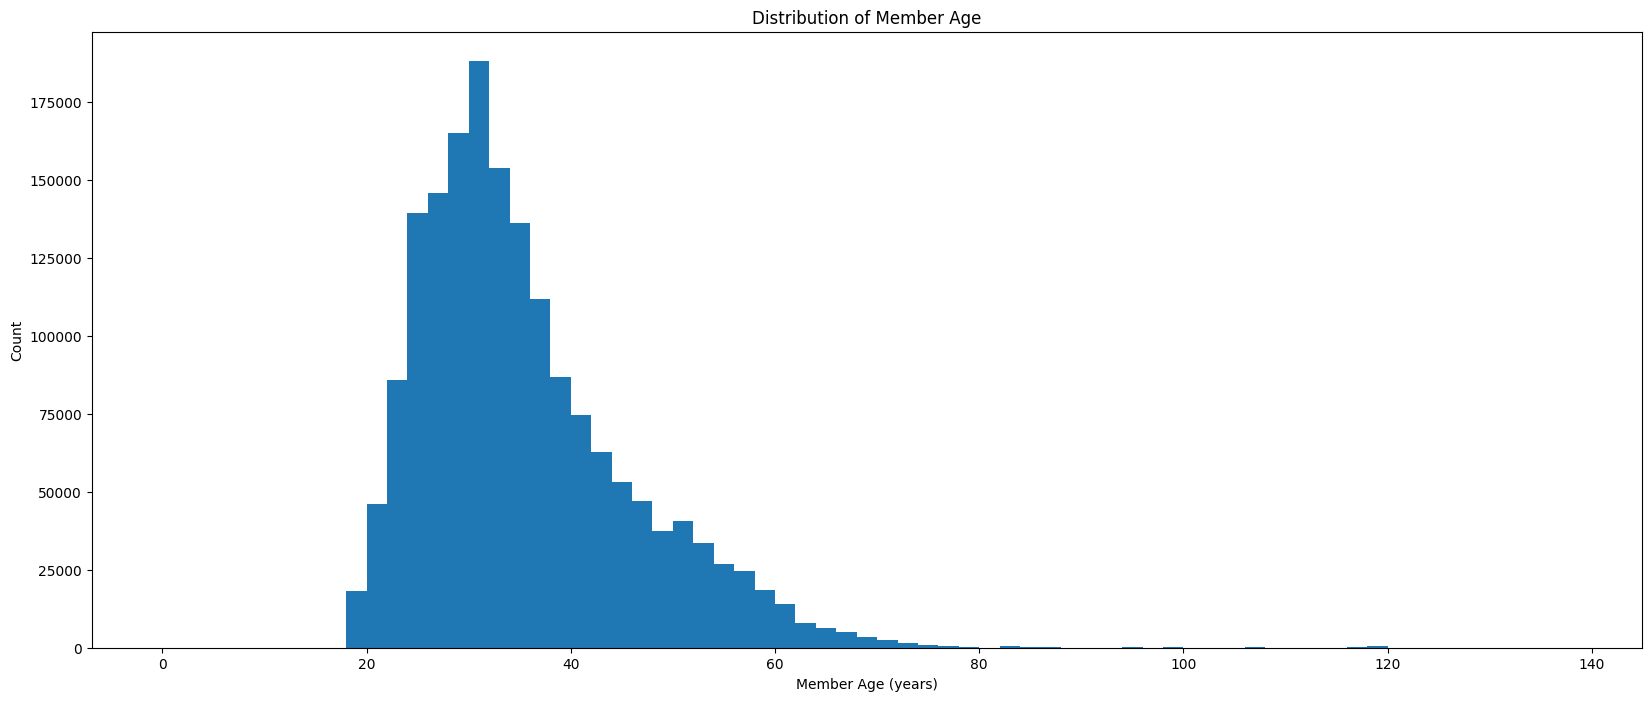

In [46]:
def plot_histogram(column, title, x_label, binsize=2, y_label='Count'):
    # Use max() to get the size of bins
    binsize = 2
    bins = np.arange(0, cc_bike_data[column].max()+binsize, binsize)
    # Find the distribution of the `member_age` using a histogram
    plt.figure(figsize=[20, 8])
    plt.hist(data=cc_bike_data, x='member_age', bins=bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

plot_histogram('member_age', 'Distribution of Member Age', 'Member Age (years)')

> The graph above shows that most riders are between 25 and 40 years old. The distribution is right-skewed, which means that the majority of the riders are young. The distribution is also unimodal, which means that there is one peak in the distribution.

The distribution looks like it contains outliers, which are values that are far from the majority of the data. To confirm this, 
lets look at the summary statistics of the `member_age` column. We will also look at the boxplot of the `member_age` column.

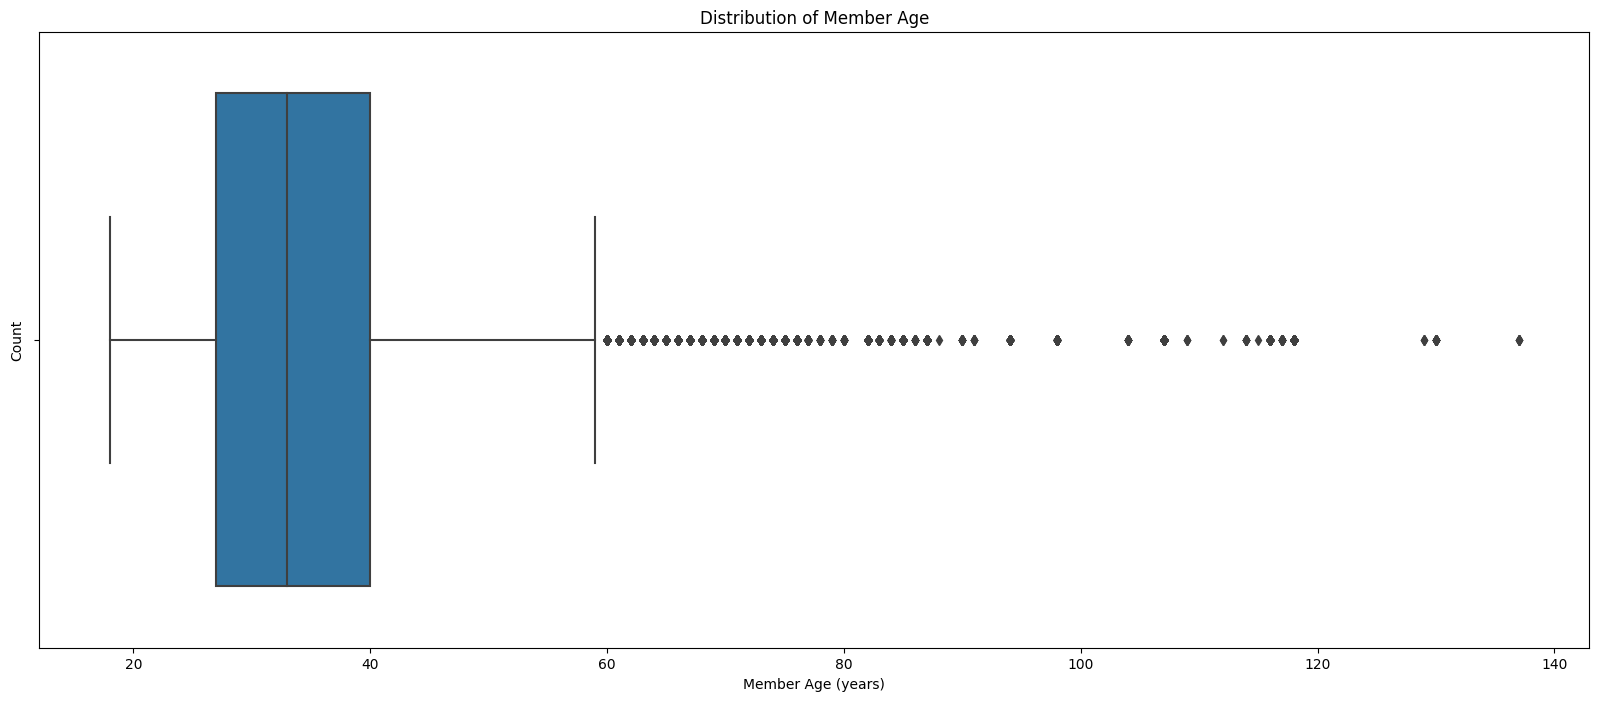

In [47]:
# Plot the distribution of the `member_age` using a boxplot
def plot_boxplot(column, title, x_label, y_label='Count'):
    # Find the distribution of the `member_age` using a boxplot.
    plt.figure(figsize=[20, 8])
    sb.boxplot(data=cc_bike_data, x=column)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

plot_boxplot('member_age', 'Distribution of Member Age', 'Member Age (years)')

> Based on the box plot above, we can see that the outliers are from the age of 60 and above.

In [48]:
cc_bike_data.query('member_age > 65').shape[0]/ cc_bike_data.shape[0] * 100

0.8865250141742488

> 99% of the riders are between 18 and 65 years old. We will treate any age above 65 as an outlier. We will remove these outliers from the dataset.

In [49]:
# Select the riders where age is below 60. Assign the result to `cc_bike_data_age`
cc_bike_data = cc_bike_data.query('member_age <= 65')

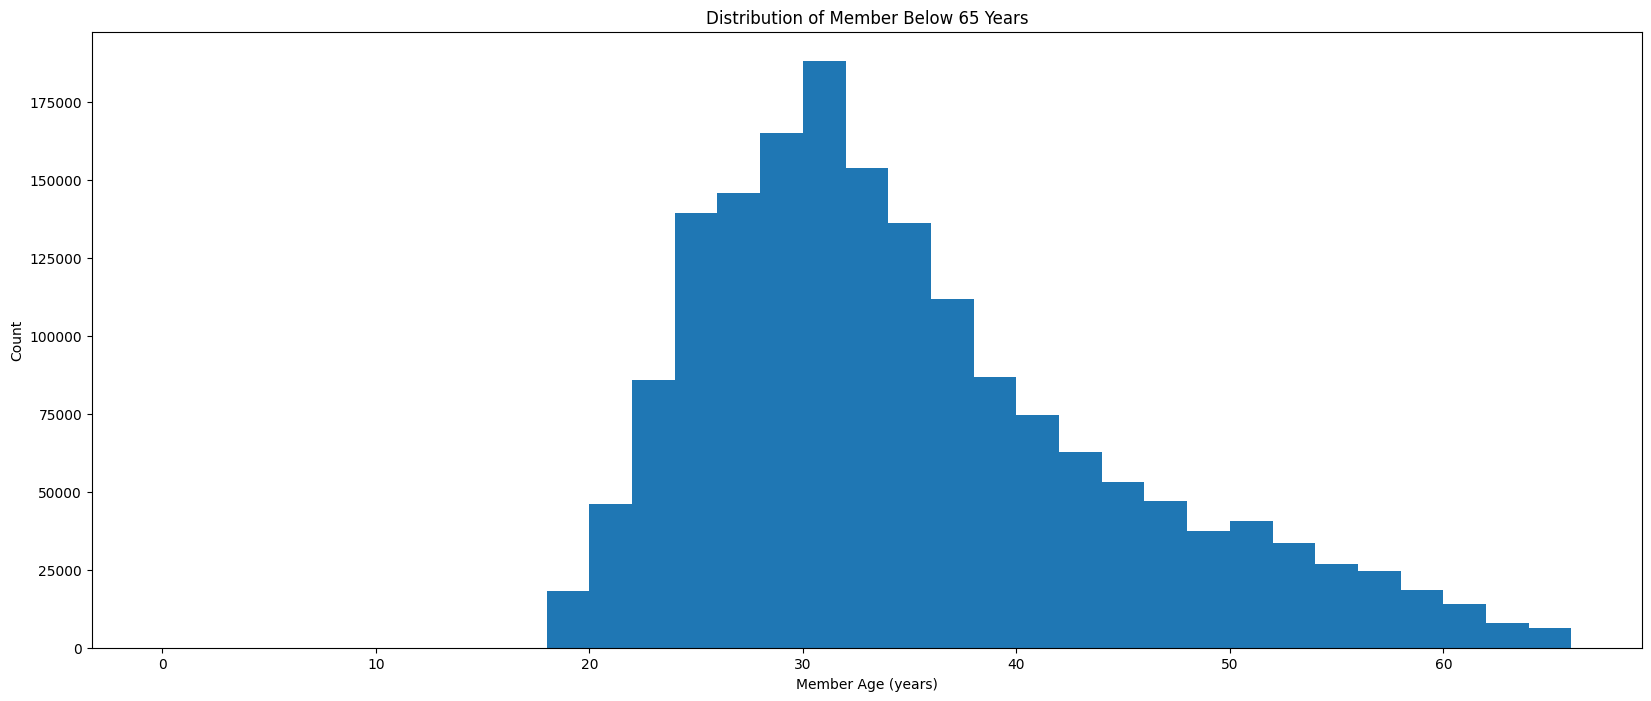

In [50]:
# Find the distribution of the `member_age` using a histogram
plot_histogram('member_age', 'Distribution of Member Below 65 Years', 'Member Age (years)')

In the bivariate exploration, we will explore if the age of the riders has an effect on the distance the riders travel.

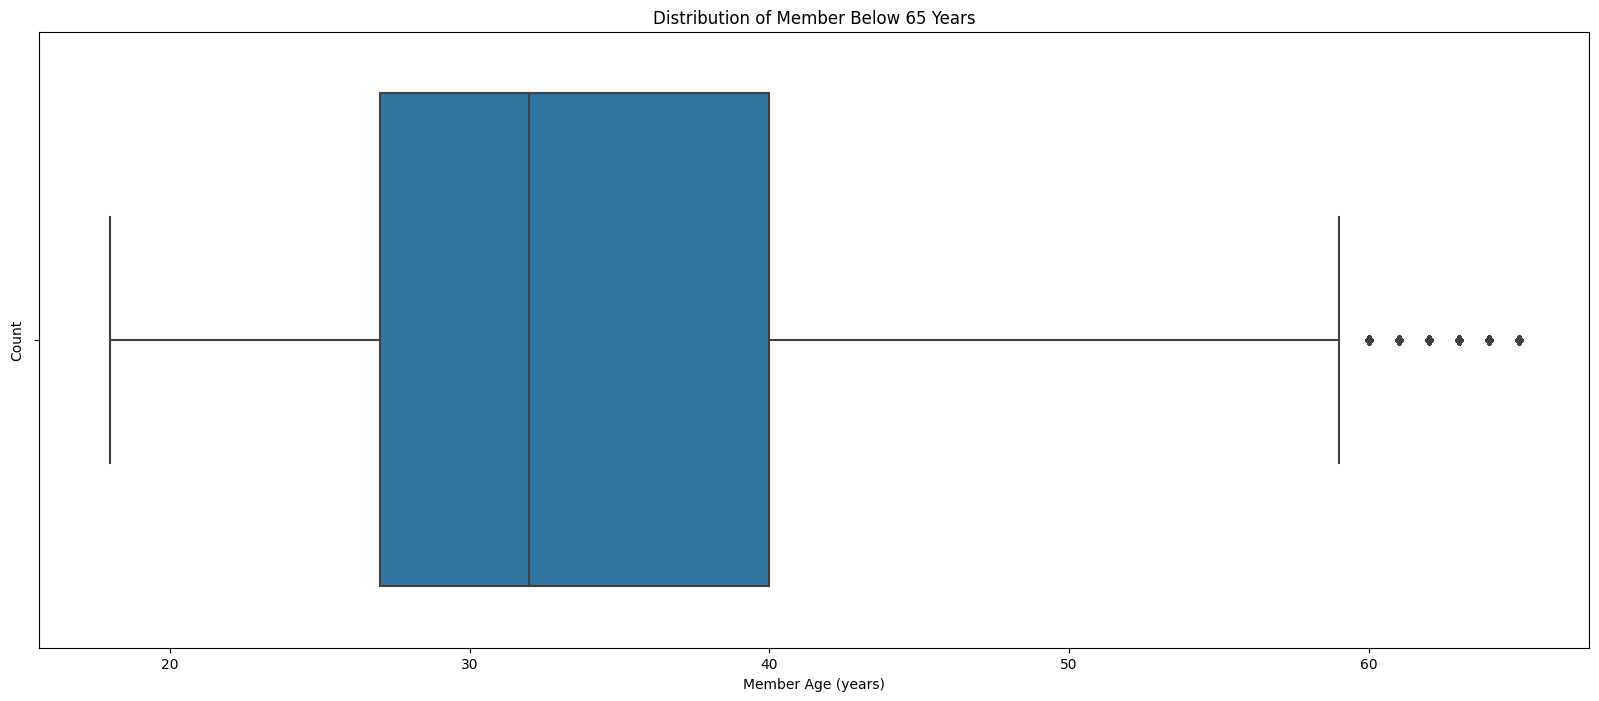

In [51]:
# Plot the distribution of the `member_age` using a boxplot
plot_boxplot('member_age', 'Distribution of Member Below 65 Years', 'Member Age (years)')

Lets perform a cut to get age-group of the users

In [52]:
# Perform a cut to divide the `member_age` into 5 bins
cc_bike_data['member_age_group'] = pd.cut(cc_bike_data['member_age'], bins=[0, 20, 30, 40, 50, 60, 70],
                                            labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60 and above'])

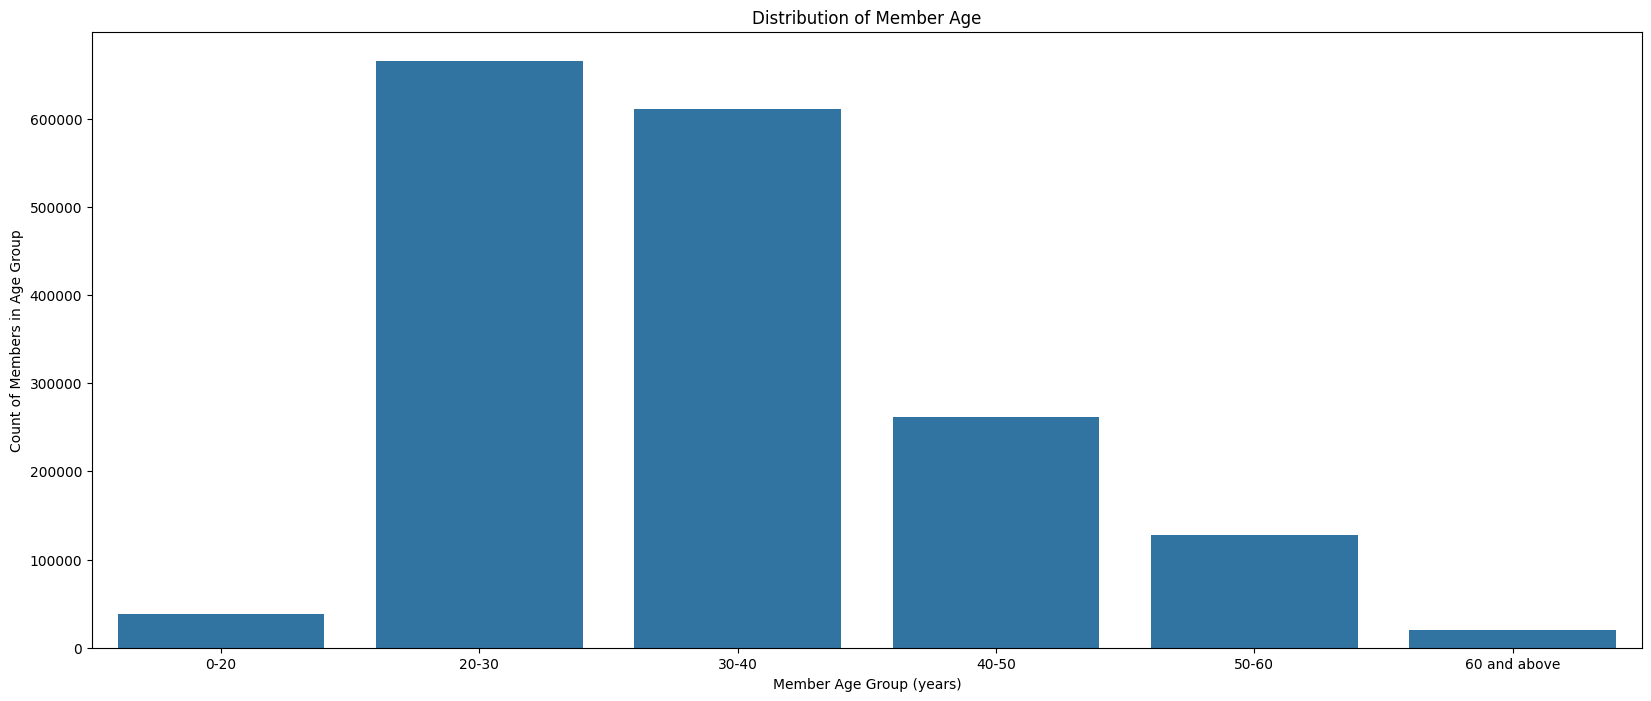

In [53]:
# Plot the distribution of the `member_age_group` using a bar chart
plt.figure(figsize=[20, 8])
sb.countplot(data=cc_bike_data, x='member_age_group', color=base_color)
plt.xlabel('Member Age Group (years)')
plt.ylabel('Count of Members in Age Group')
plt.title('Distribution of Member Age');

> Based on the histogram I created, it seems that the age of the riders in the Ford GoBike dataset ranges from about 18 to 60 years old. I can see that the median age is around 34 years old, and the majority of riders fall between the ages of 27 to 40 years old (the upper quartile). The lower quartile ranges from around 24 to 31 years old.

> Using the cut function, I created a new column called `member_age_group` to categorize the riders into five age groups: `0-20`, `20-30`, `30-40`, `40-50`, `50-60` and `60 and above`. The majority of riders fall into the `20-30` age group, which is consistent with the histogram above.

> Interestingly, I also noticed that there are several outliers above the upper quartile, indicating that there are a significant number of older riders who are using the bike share system. This suggests that there may be a group of older riders who are using the system for transportation, recreation, or exercise.

> However, it's important to note that my analysis is based on the assumptions made from the histogram, and further investigation and analysis may be needed to fully understand the characteristics and behaviors of the riders in the dataset. It's also crucial to consider potential biases in the dataset and to be careful about generalizing these findings to other populations or contexts. **We will explore the the relationship between distribution of (`user_type` and `member_age_group`) and (`user_type` and `member_age_group`)** to understand the demography of riders in age groups.

### **Save the cleaned datasetfor the Part_II_slide_deck.ipynb**

In [54]:
cc_bike_data.to_csv('data/part_II_bike_data.csv', index=False)

#### 2. What are top 10 starting points for the bike-sharing system?

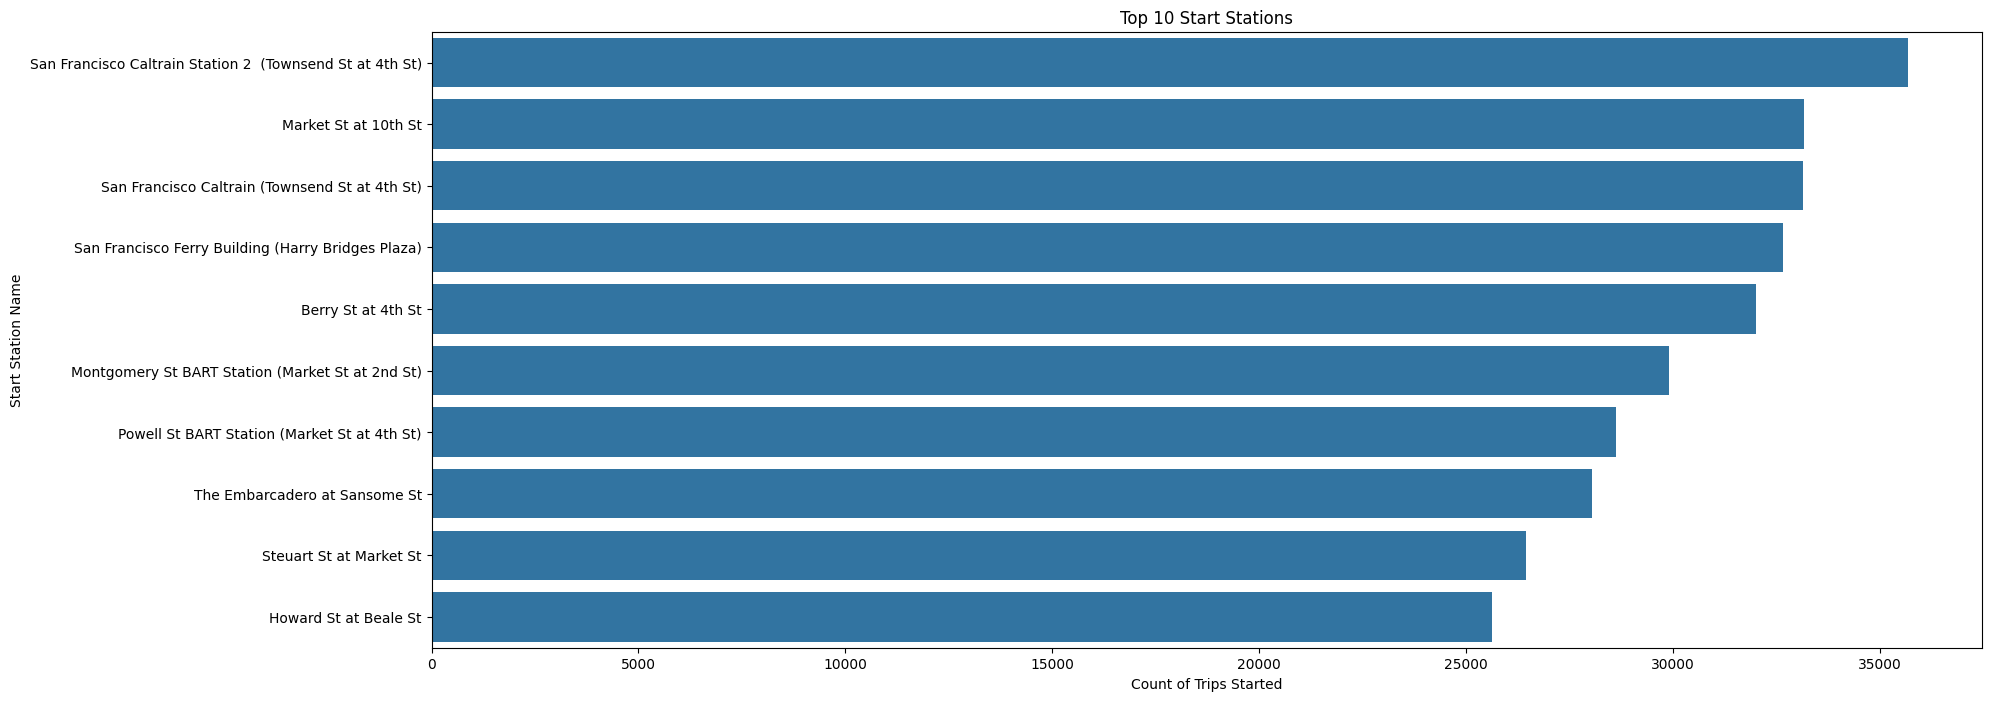

In [55]:
# top 10 start stations
cc_bike_data.start_station_name.value_counts().head(10)

# plot the top 10 start stations
plt.figure(figsize=(20, 8))
sb.countplot(data=cc_bike_data, y='start_station_name', order=cc_bike_data.start_station_name.value_counts().head(10).index, color=base_color)
plt.title('Top 10 Start Stations')
plt.xlabel('Count of Trips Started')
plt.ylabel('Start Station Name');

> We can see that the most popular starting points are **San Francisco Caltrain Station 2 (Townsend St at 4th St)**, **Market St at 10th St** and **San Francisco Caltrain (Townsend St at 4th St)**. These locations may be hubs for transportation, such as train and bus stations, making them convenient and easily accessible starting points for people commuting to work or other destinations.

> To understand the demography of riders in these top 10 starting points, we will explore the user type (`user_type` and gender `member_gender`) using the bike-sharing system in top 10 starting points.

#### 3. When are most trips taken in terms of time of day (`period_of_day`)

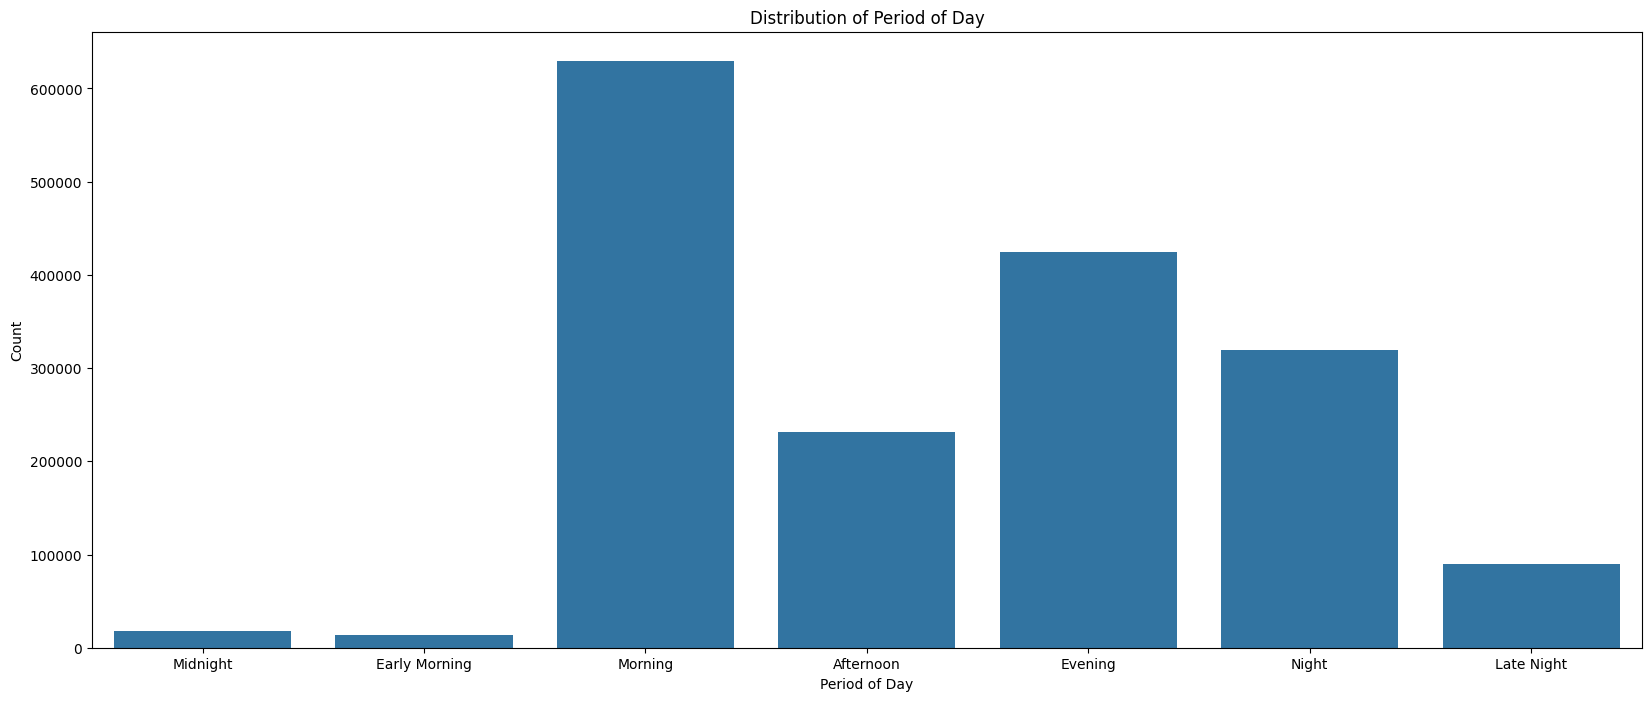

In [56]:
# Plot the distribution of the `period_of_day` using a countplot
def plot_countplot(column, title, x_label, y_label='Count'):
    plt.figure(figsize=[20, 8])
    sb.countplot(data=cc_bike_data, x=column, color=base_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

plot_countplot('period_of_day', 'Distribution of Period of Day', 'Period of Day')

> The graph above shows that a large number of rides are taken during the morning and evening hours. Specifically, the 'Morning' period (between 6-11 AM) and 'Evening' period have the highest number of rides, while the 'Midnight' period (between 12AM-3AM) has the lowest number of rides.

> This observation suggests that the bike share system is being heavily used by individuals who are commuting to and from work or school during peak morning and evening hours.

> However, it's important to note that this analysis is based on the assumptions made from the 'period_of_day' column and that further investigation may be needed to fully understand the reasons behind this pattern. Factors such as weather, local events, and user demographics may also play a role in the trends observed.

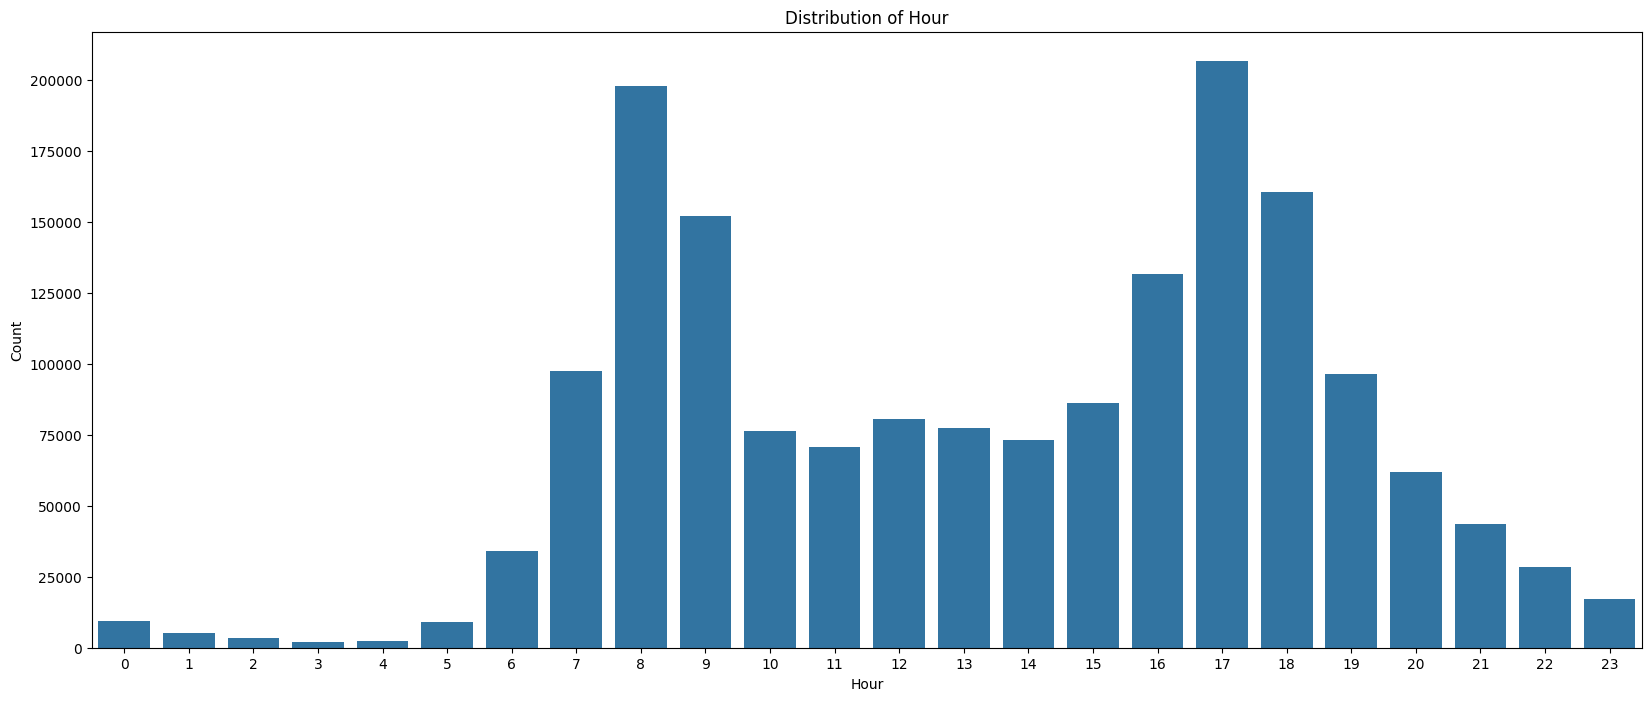

In [57]:
# Plot the distribution of the hour using a countplot
plot_countplot('hour', 'Distribution of Hour', 'Hour')

> Expanding on the previous observation, it looks that the bike share system is being heavily used at 8 AM and 5 PM. This suggests that the bike share system is being heavily used by individuals who are commuting to and from work or school during peak morning and evening hours.

> There is a significant drop in the number of rides starting at 11:00PM to 4:00AM.

#### 4. When are most trips taken in terms of day of week (`days_of_week`)

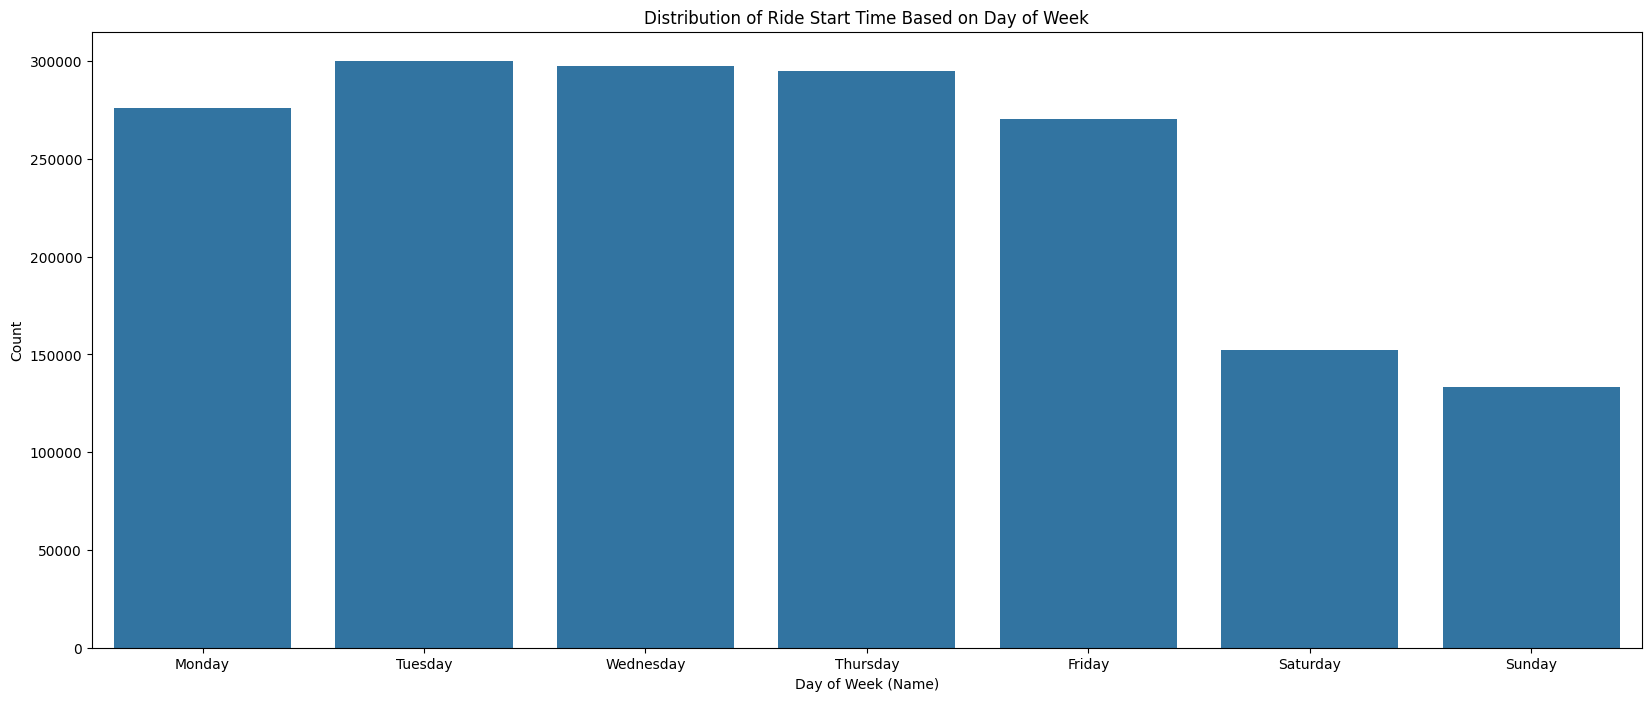

In [58]:
# Count plot of `days_of_week_name` bike rides
plt.figure(figsize=[20, 8])
sb.countplot(data=cc_bike_data, x='day_of_week', color=base_color)
plt.xlabel('Day of Week (Name)')
plt.ylabel('Count')
plt.title('Distribution of Ride Start Time Based on Day of Week');

> After analyzing the Ford GoBike dataset, I found that most rides are taken during the weekdays. Specifically, the majority of rides occur on Mondays, Tuesdays, Wednesdays, Thursdays, and Fridays, with a noticeable drop in rides on the weekends.

> This observation suggests that the bike share system is primarily being used for weekday commuting or transportation, potentially for work or school-related purposes. It may also indicate that riders are less likely to use the bike share system for recreational or leisure activities on the weekends, or that there are other transportation options that are more popular on weekends.

> However, it's important to note that there may be other factors that could be contributing to this trend, such as weather, time of year, or local events. Further analysis and investigation may be needed to fully understand the reasons behind this pattern.

#### 5. When are most trips taken in terms of month of the year(`month`)

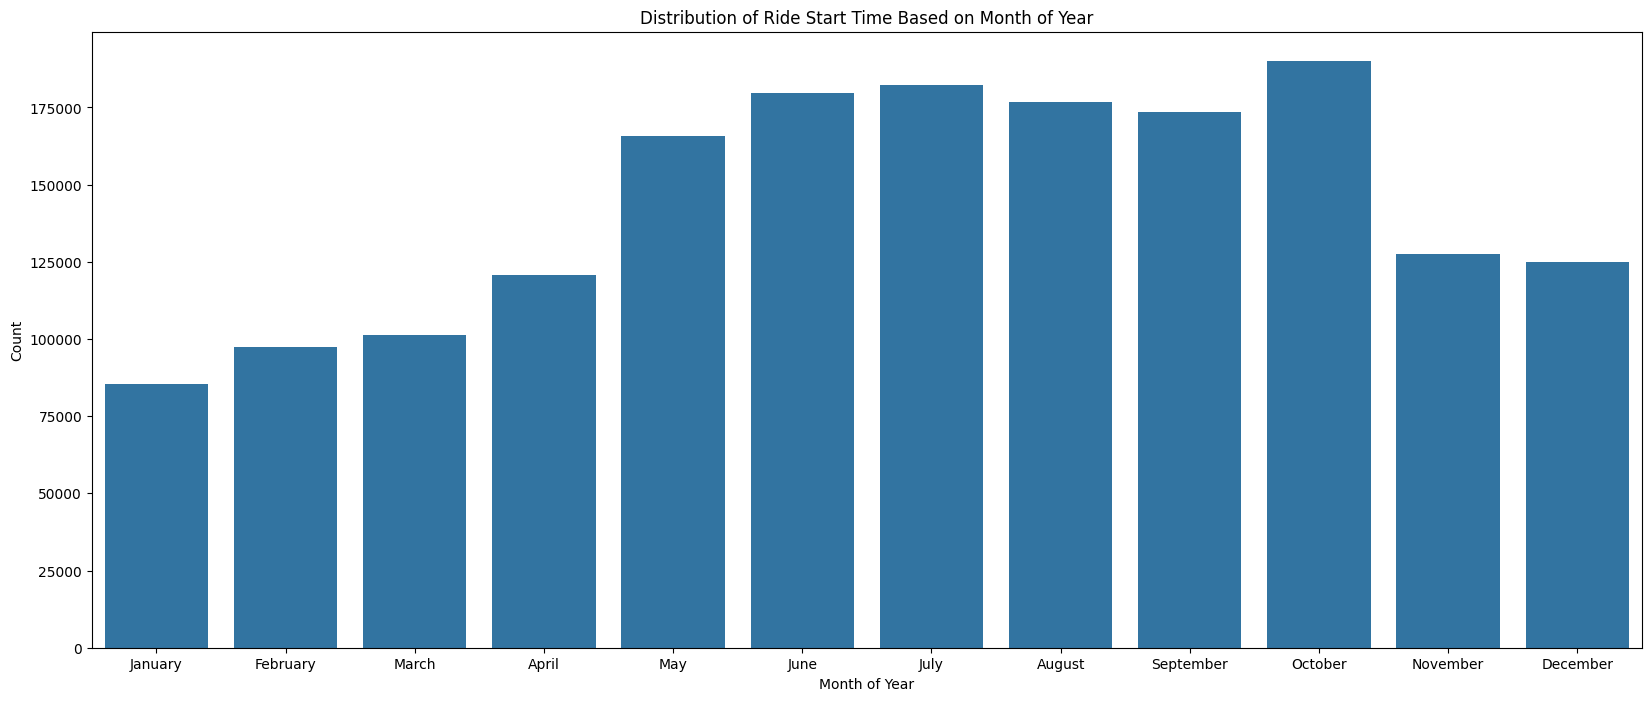

In [59]:
# Count plot of distribution of `month_of_year` bike rides
plt.figure(figsize=[20, 8])
sb.countplot(data=cc_bike_data, x='month_of_year', color=base_color)
plt.xlabel('Month of Year')
plt.ylabel('Count')
plt.title('Distribution of Ride Start Time Based on Month of Year');

> After analyzing the Ford GoBike dataset, I found that the months with the highest number of rides are May through October, with the highest number of rides occurring in October. This trend suggests that the bike share system is being used more frequently during the warmer months of the year, potentially due to favorable weather conditions and longer daylight hours.

> Additionally, the increase in rides during the summer months may also be due to an increase in tourism and outdoor activities during this time, which could lead to more individuals using the bike share system for transportation and recreation.

> It's important to note that this observation is based on the assumptions made from the data and further investigation may be needed to fully understand the reasons behind this pattern. Factors such as local events, promotional campaigns, and user demographics could also play a role in the trends observed. Nonetheless, this finding can be useful for bike share operators to better understand the ridership patterns and plan for capacity and maintenance during peak seasons.

> In the next section, we will explore if there is significant difference between user type through out the year. It will help us understand if there are years which are preferrable for the bike-sharing system for a certain user eg subscribers.

#### 6. What is the distribution of riders based on gender (`member_gender`)?

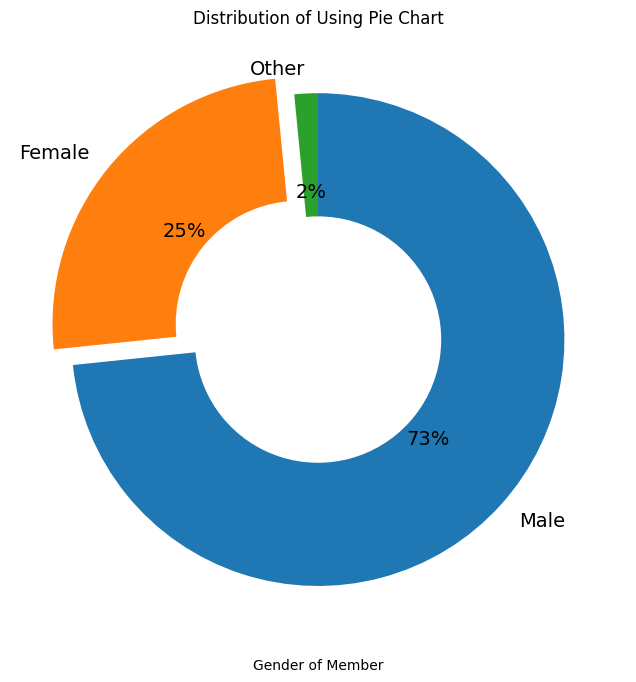

In [60]:
plt.figure(figsize=[20, 8])

# Donut chart of `member_gender` bike rides
member_gender_counts = cc_bike_data["member_gender"].value_counts()
member_gender_counts.plot(kind='pie', autopct='%1.0f%%', startangle=90, counterclock=False,
                        wedgeprops={'width':0.5}, textprops={'fontsize': 14}, explode=[0, 0.1, 0])
plt.xlabel("Gender of Member")
plt.ylabel('')
plt.title('Distribution of Using Pie Chart');

When plotting a donut plot for `member_gender`, it was observed that there were more male riders than female or other gender riders. This observation could be due to a number of factors.

One possible explanation could be that males are generally more likely to use bike sharing services for commuting, exercise, or leisure compared to females. The observation that there are more male riders in the bike sharing service could be due to factors such as differences in usage patterns, marketing, or biases in data collection. It's important to consider these factors when interpreting the results of data analysis.

#### 7. What is the distribution of riders based on user type (`user_type`)?

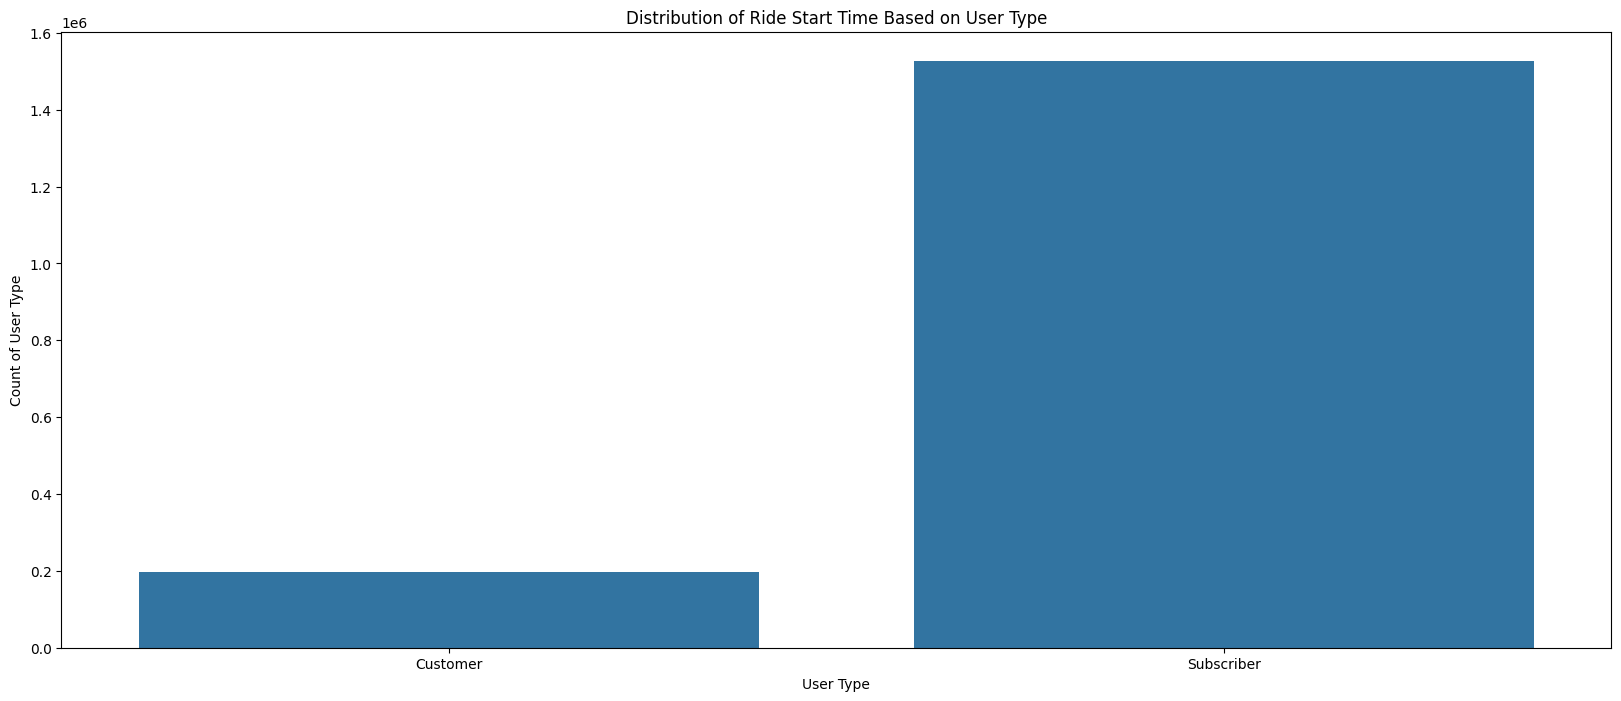

In [61]:
# Plot distribution of `user_type` bike rides using countplot
plt.figure(figsize=[20, 8])
sb.countplot(data=cc_bike_data, x='user_type', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count of User Type')
plt.title('Distribution of Ride Start Time Based on User Type');

> When plotting a countplot for `user_type`, it was observed that there were more subscribers than customers in the bike sharing service. This observation is likely due to the fact that the service is more geared towards long-term users who would benefit from the subscription model. Subscribers may use the service for daily commuting, while customers are more likely to use it for short-term or occasional trips. Additionally, the subscription model may offer discounts or other benefits to encourage users to sign up, which could contribute to the higher number of subscribers.

> It's important to note that this observation is based on the specific dataset used for the analysis, and that the results could vary depending on the time period or geographic area being considered. However, in general, the trend of higher numbers of subscribers compared to customers is commonly seen in bike sharing services and other similar subscription-based models.

#### 8. What is the distribution of the duration of the rides?
We will convert the `duration_sec` column to minutes and then plot a histogram to see the distribution of the duration of the rides.

In [62]:
# convert the duration_sec to minutes
cc_bike_data['duration_min'] = cc_bike_data['duration_sec'] / 60

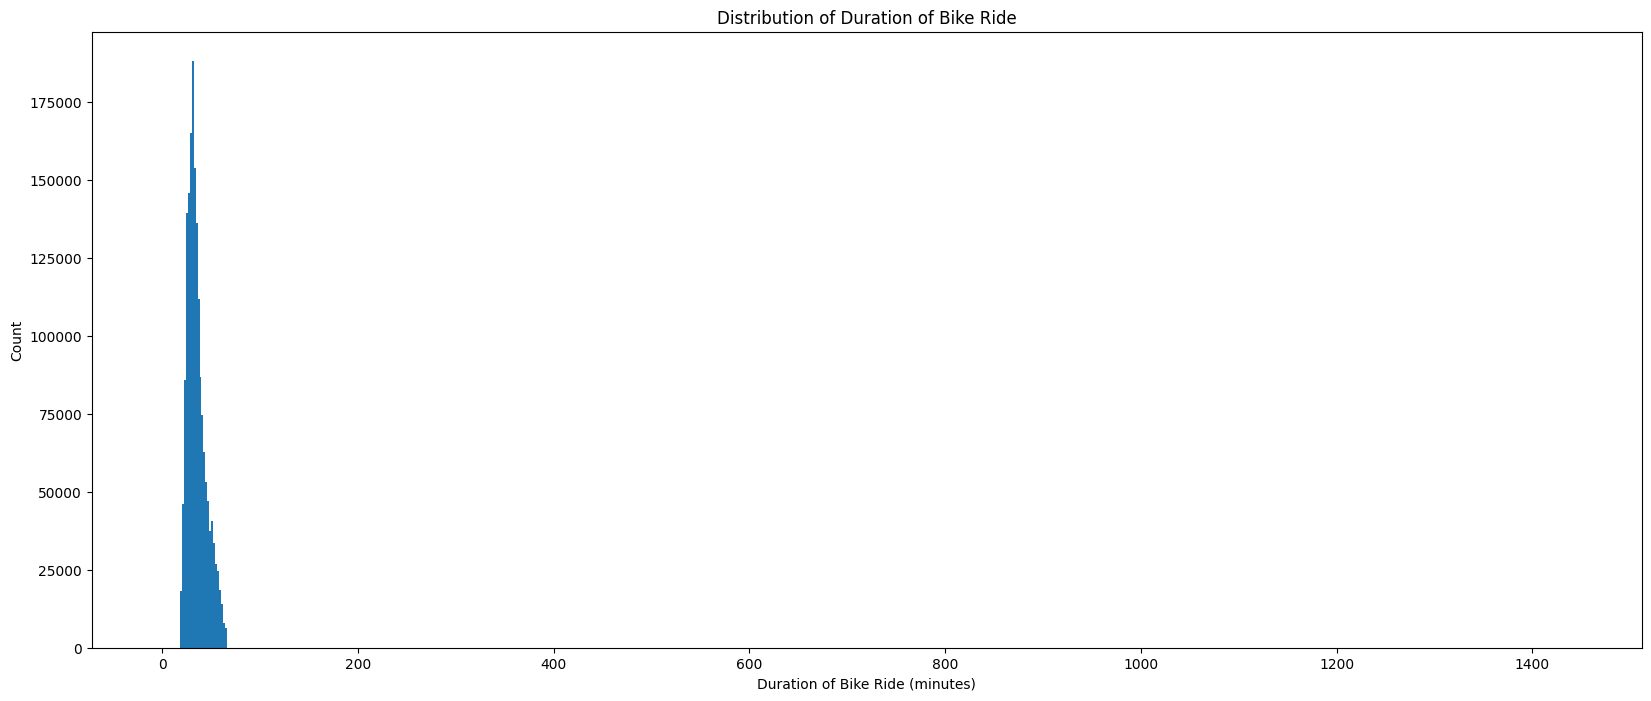

In [63]:
# Plot the distribution of the `duration_min` using a histogram
plot_histogram('duration_min', 'Distribution of Duration of Bike Ride', 'Duration of Bike Ride (minutes)', 2)

Lets perform a `describe()` function on the `duration_min` column to get a better idea of the distribution of the duration of the rides. It appears there are outliers in the data. Lets look use the log transformation to see if we can get a better idea of the distribution.

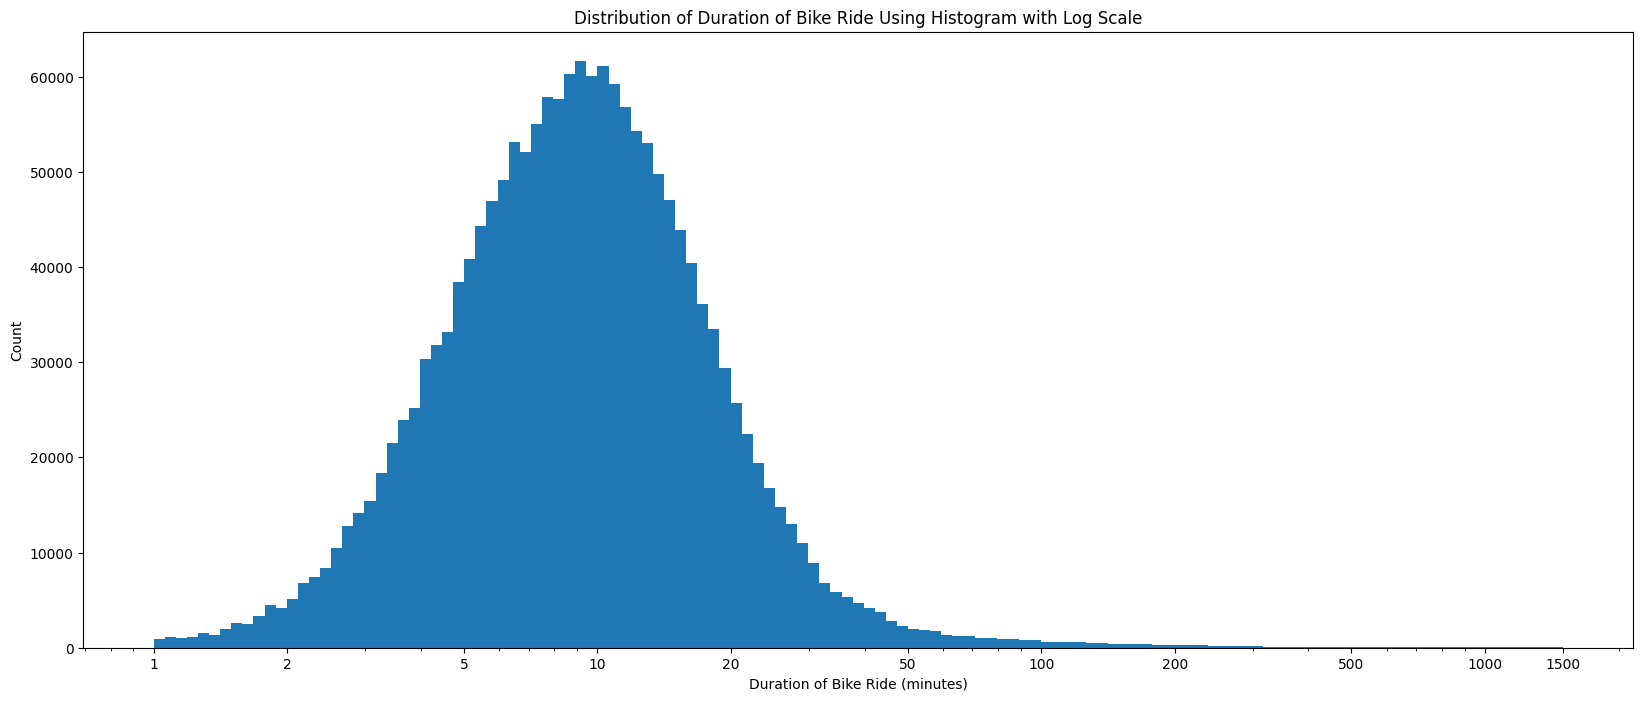

In [64]:
def plot_histogram_duration():
    # Plot the distribution of the `duration_min` using a histogram with log scale
    plt.figure(figsize=[20, 8])
    binsize = .025
    bins = 10 ** np.arange(0, np.log10(cc_bike_data['duration_min'].max())+binsize, binsize)
    plt.hist(data=cc_bike_data, x='duration_min', bins=bins)
    plt.xscale('log')
    plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 1500], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 1500])
    plt.xlabel('Duration of Bike Ride (minutes)')
    plt.ylabel('Count')
    plt.title('Distribution of Duration of Bike Ride Using Histogram with Log Scale');

plot_histogram_duration()

> For most of the rides, most of the rides are between 5 and 20 minutes. The distribution is right-skewed, which means that the majority of the rides are short. The distribution is also unimodal, which means that there is one peak in the distribution. 

> Did the people who took long rides go travel long distances? To answer this question, in **bivariate exploration part** we will plot a scatterplot of `duration_min` and `distance` to see if there is a relationship between the duration of the ride and the distance traveled.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After conducting a thorough analysis of the dataset, I found several critical variables that are important to understanding the data findings. These variables include the monthly trend of bike riders, age groups of bike riders, gender-wise rides, weekdays, and peak hours. The original dataset contained 1,863,721 bike rides that occurred from January to December 2018, but for simplicity, I limited the data to members who were 80 years old and below.

> Based on the analysis, bikes are in high demand between April and October, likely due to the summer season, and ridership drops during the winter months. Weekdays, particularly from Monday to Friday, see more rides than weekends, with 8-9 am and 5-6 pm being the busiest hours for daily bike riders.

> Furthermore, the analysis also revealed patterns in gender and age. Males utilized the bike share services more than females, and people in the 20-30 age bracket were more frequent riders than other age groups. These observations highlight important trends in bike usage that can inform decision-making for the bike sharing service

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I wanted to examine the distribution of the ride durations, and discovered it was right-skewed. I applied a log transformation to get a better understanding of the distribution, and although it remained right-skewed, it became more normal than before.

> To determine the time of day when most riders are utilizing the bike share system, I created a new column called `period_of_day` that categorizes the start time into 7 periods: 'Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'. Moreover, I created an ordered categorical variable type using `pd.Categorical()` and `ordered=True` to ensure that the periods are ordered correctly.

> I also created a new column called `month` that categorizes the start time into 12 months: 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'. I used the `apply()` function to apply the `lambda` function to the `start_time` column. Moreover, I created an ordered categorical variable type using `pd.Categorical()` and `ordered=True` to ensure that the months are ordered correctly. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### 1. Distribution of members age (`member_age`) and distance traveled (`distance`) in kilometers
In the **Univariate Exploration** section, we saw the distribution of age. Does the age affect the distance traveled? Lets see if there is a relationship between the `member_age` and `distance` using a pointplot.

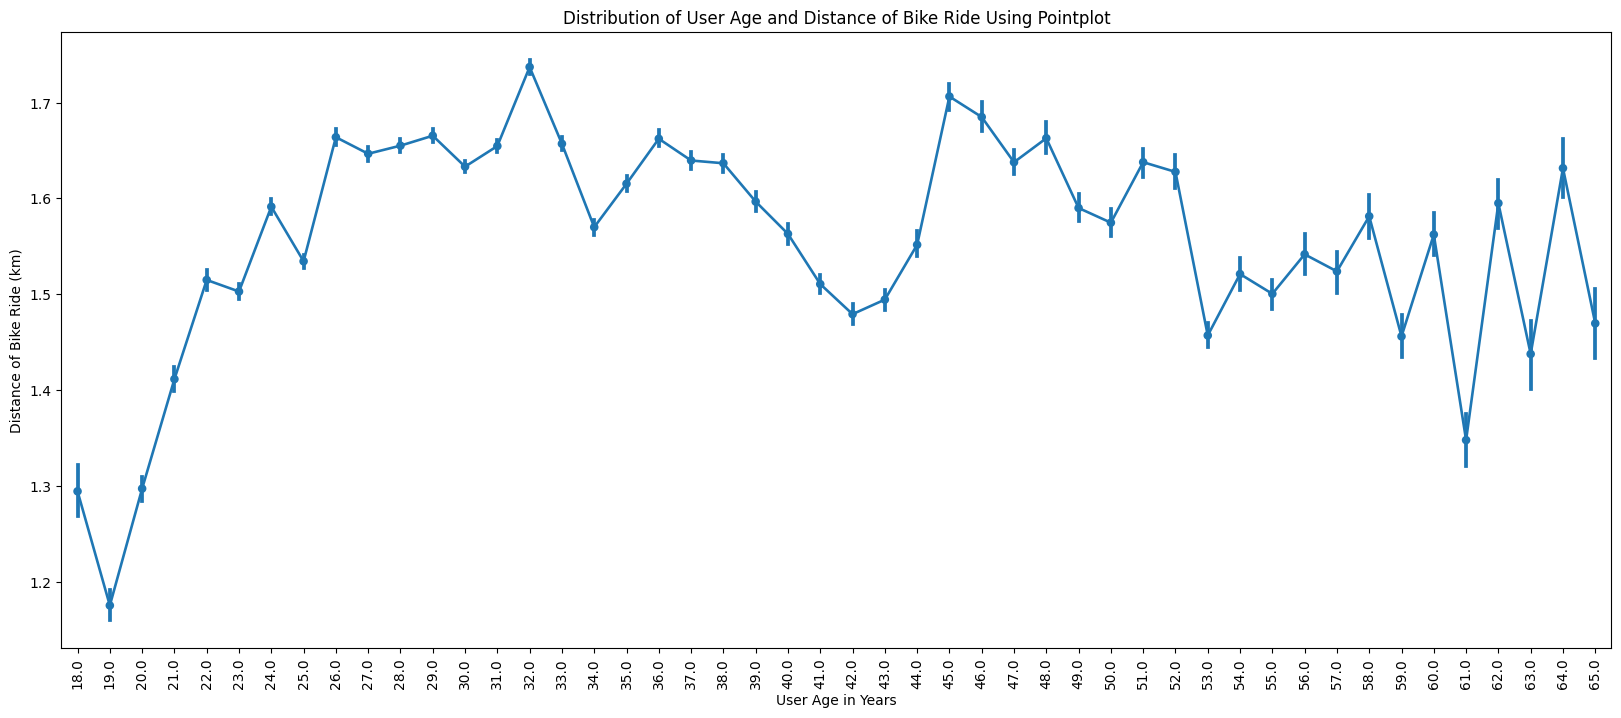

In [65]:
# pointplot of `member_age` and `distance`
plt.figure(figsize=(20, 8))
sb.pointplot(data=cc_bike_data, x='member_age', y='distance', scale=.7, color=base_color)
plt.xlabel('User Age in Years')
plt.ylabel('Distance of Bike Ride (km)')
plt.title('Distribution of User Age and Distance of Bike Ride Using Pointplot')
plt.xticks(rotation=90);

The distribution of the `member_age` and `distance` shows that the majority of the oldest riders had the greatest fluctuation between the shortest and longest distance traveled. This could be due to the fact that the oldest riders are more likely to use the bike share system for recreation and leisure. However, it is worth noting that the distance might not be accurate as the `Haversine` formula does not take into account the routes taken by the riders.

#### 2. What distribution of user type i.e customer or subscribers are using the bike-sharing system in top 10 starting points?
In **Univariate Exploration** we saw distrubution of how many riders start their ride in top 10 stations. Now lets see what user type (`user_type` and gender `member_gender`) using the bike-sharing system in top 10 starting points.

In [66]:
def top_stations_data(title, hue, y_label='Start Station Name', x_label='Number of Bike Rides'):
    # Plot the top 10 stations with most number of bike rides
    plt.figure(figsize=[20, 8])
    sb.countplot(data=cc_bike_data, y='start_station_name', hue=hue, order=cc_bike_data.start_station_name.value_counts().iloc[:10].index)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('Distribution of ' + title + ' Based on Start Station Name')
    plt.legend(title=title);

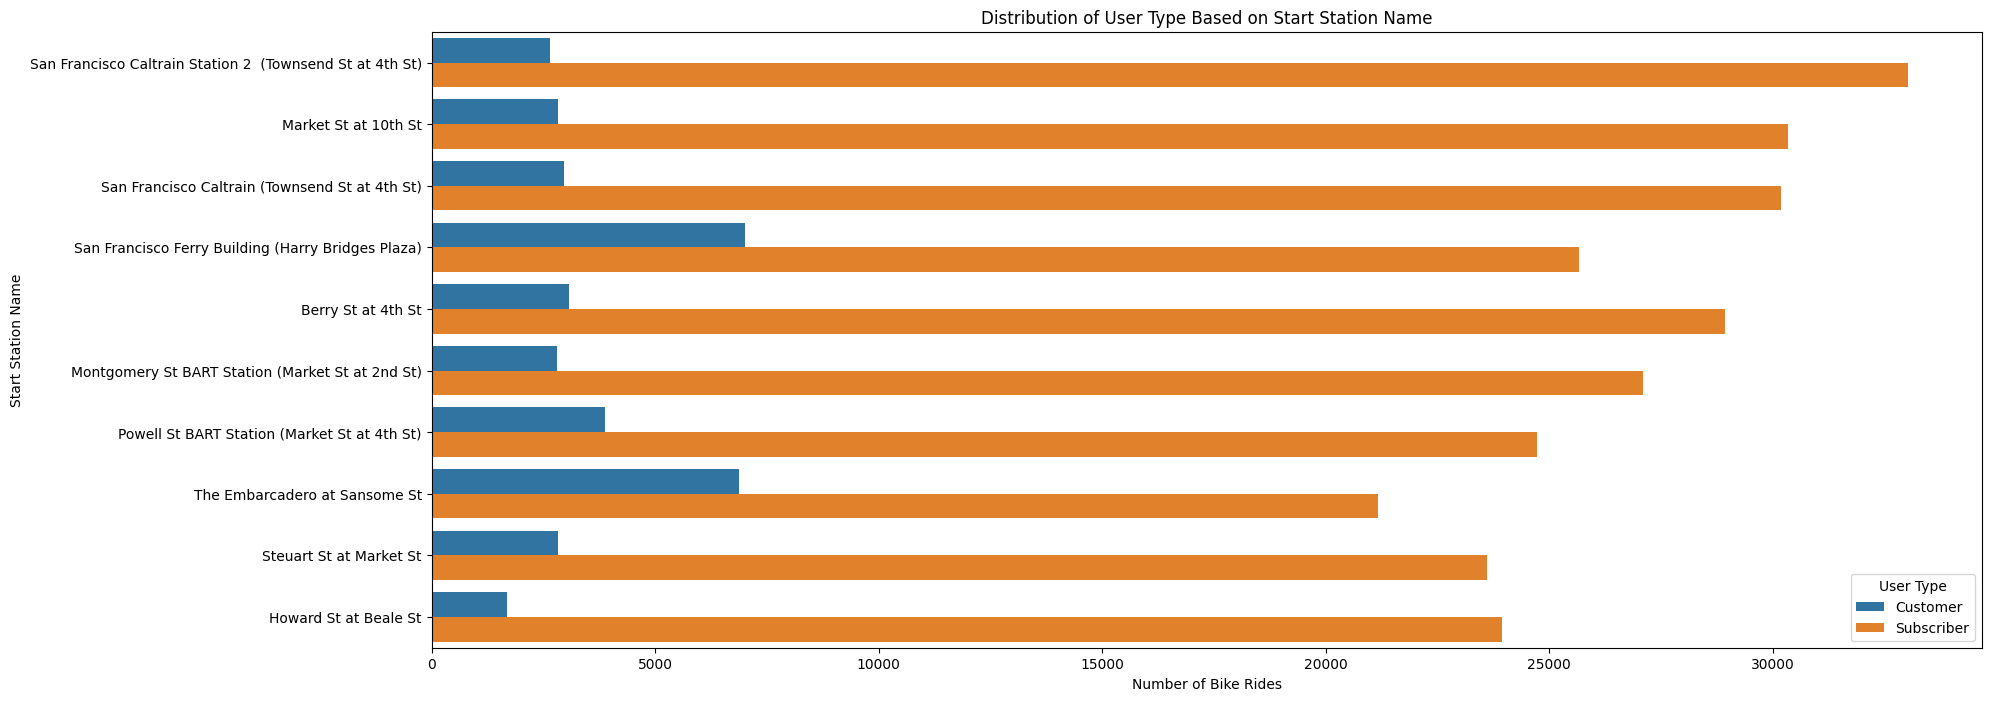

In [67]:
# clustered bar chart of `user_type` bike rides in the 10 most common `start_station_name`
top_stations_data('User Type', 'user_type')

> After analysis, we can see that the top 10 starting points are mostly used by subscribers. This is expected as subscribers are more likely to use the bike-sharing system for daily commuting. Customers are more likely to use the bike-sharing system for short-term or occasional trips.

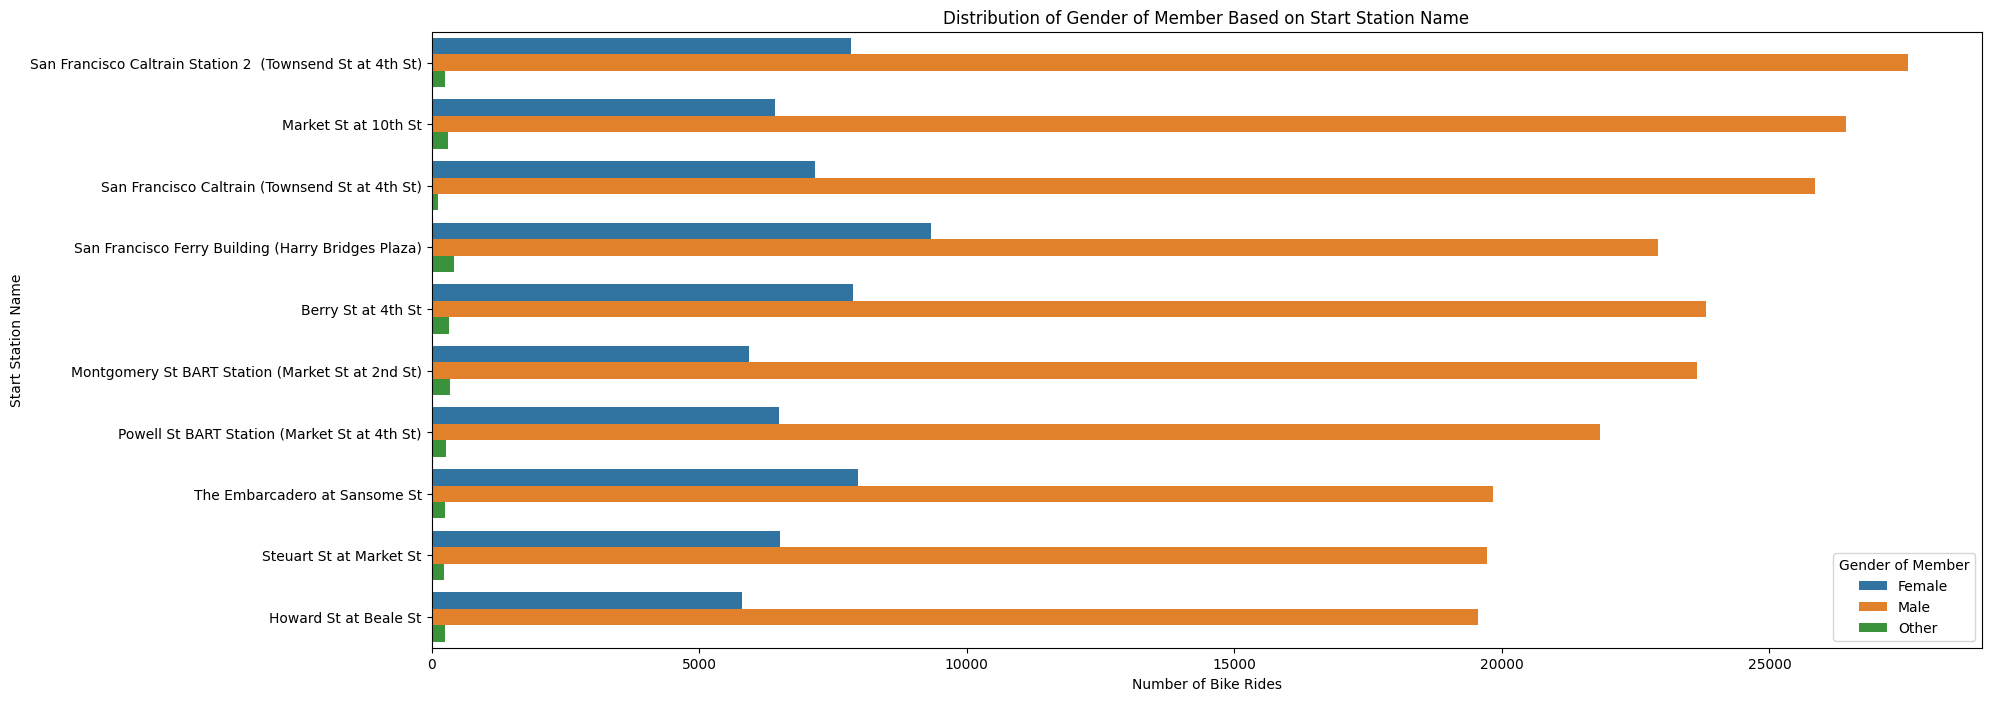

In [68]:
# clustered bar chart of `member_gender` bike rides in the 10 most common `start_station_name`
top_stations_data('Gender of Member', 'member_gender')

As we can see, the top 10 starting points, males are frequent riders departing these starting stations. It is possible that males are the primary users of the bike share system for commuting purposes, especially during peak hours. As a result, the top starting points may be locations that are commonly used for commuting.

#### 3. What is the relationship between `user_type`/`member_gender` and `member_age_group`?
In **Univariate Exploration**, we saw that 73% of riders were males, we also noticed that in age brackets, those in 20-30 years were more frequent riders, let's explore if there in particular gender or user type that is more frequent in the age bracket variables.

In [69]:
def plot_bivariate_countplot(x_column, y_column, title, x_label, legend, y_label='Count', pallette=None):
    sb.countplot(data=cc_bike_data, x=x_column, hue=y_column, palette=pallette)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=legend);

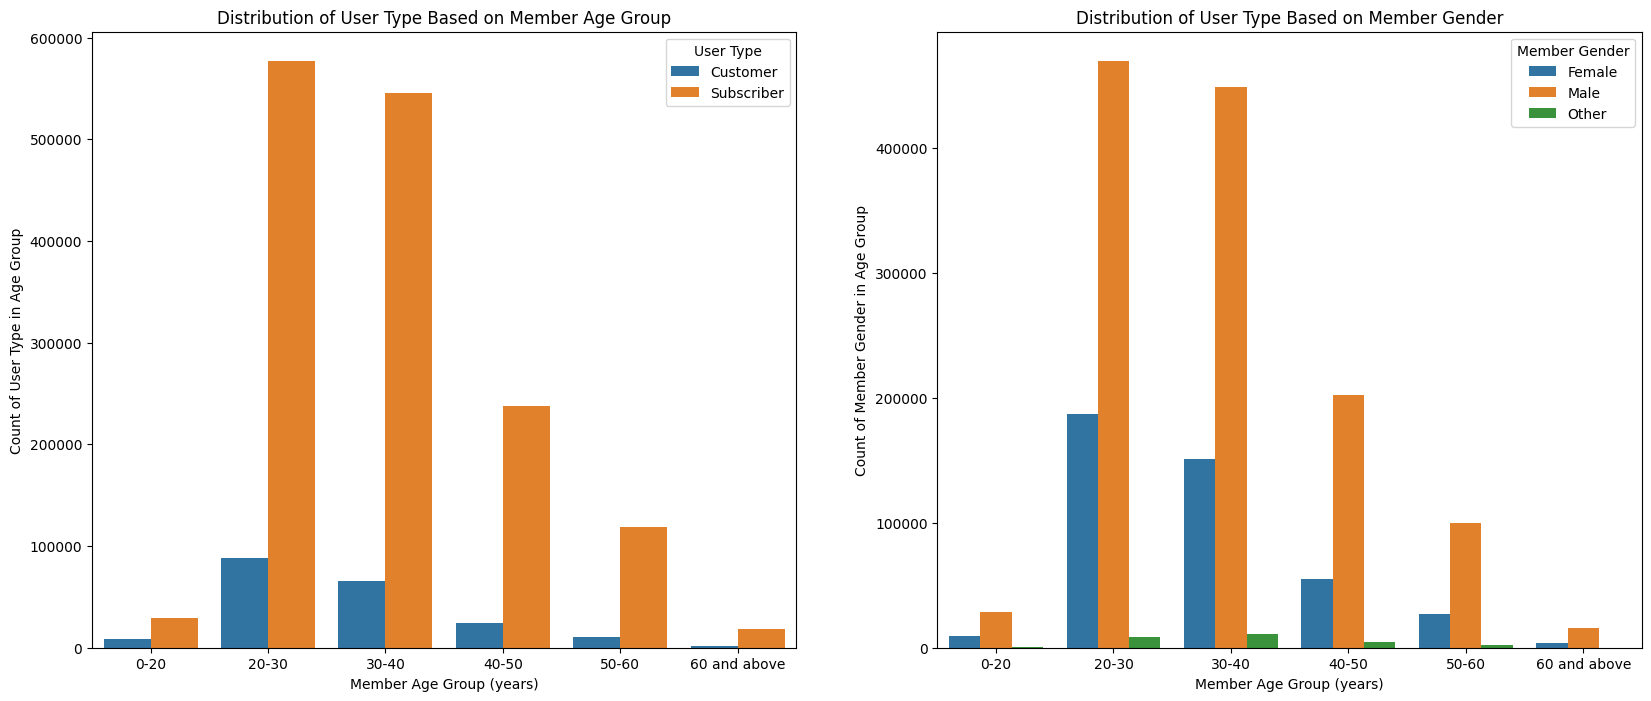

In [70]:
plt.figure(figsize=[20, 8])

plt.subplot(1, 2, 1)
# Plot the relationship between `member_age_group` and `user_type` using a clustered bar chart
plot_bivariate_countplot('member_age_group',
                        'user_type', 
                        'Distribution of User Type Based on Member Age Group',
                        'Member Age Group (years)',
                        'User Type',
                        'Count of User Type in Age Group',
                        )

plt.subplot(1, 2, 2)
# Plot the relationship between `member_age_group` and `member_gender` using a clustered bar chart
plot_bivariate_countplot(
    'member_age_group',
    'member_gender',
    'Distribution of User Type Based on Member Gender',
    'Member Age Group (years)',
    'Member Gender',
    'Count of Member Gender in Age Group',
)

> In the above analysis, between `member_age_group` vs `user_type`, we can see that the majority of the users are subscribers. This is expected as the bike sharing service is more geared towards long-term users who would benefit from the subscription model. Subscribers may use the service for daily commuting, while customers are more likely to use it for short-term or occasional trips. Additionally, the subscription model may offer discounts or other benefits to encourage users to sign up, which could contribute to the higher number of subscribers.

> Looking at the relationship between  `member_age_group` vs `member_gender`, majority of users are male. This is shown in all age brackets. 

#### 4. What is the relationship between `duration_min` and `distance`?

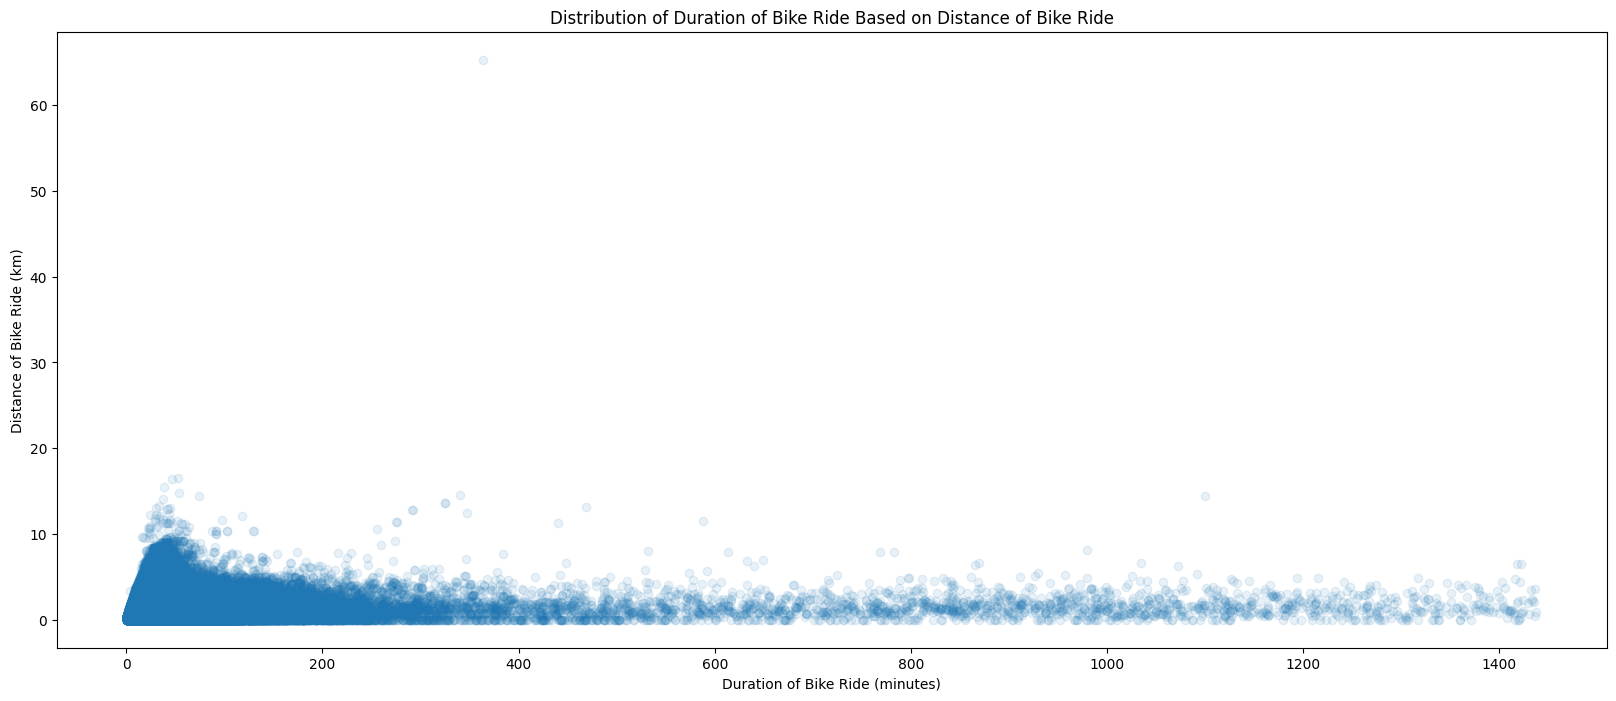

In [71]:
# Plot the relationship between `duration_min` and `distance_km` using a scatter plot
plt.figure(figsize=[20, 8])
sb.regplot(data=cc_bike_data, x='duration_min', y='distance', fit_reg=False, scatter_kws={'alpha':0.1})
plt.xlabel('Duration of Bike Ride (minutes)')
plt.ylabel('Distance of Bike Ride (km)')
plt.title('Distribution of Duration of Bike Ride Based on Distance of Bike Ride');

> The relationship between the `duration_min` and the `distance` that the bike was ridden is not clear. Lets investigate the `start_station_id` and `end_station_id` to see if we can get a better idea of the relationship.

In [72]:
# Select the subset of data where start station and end station are the same
same_station = cc_bike_data[cc_bike_data['start_station_id'] == cc_bike_data['end_station_id']]
same_station.shape

(41305, 24)

> We can see that there riders who rode the bike for a long duration but did not travel a long distance. This could be due to the fact that the bike was used for leisure or recreation. However, after investigating the `start_station_id` and `end_station_id`, we can see that some riders rented the bike and then returned it to the same station. Moreover, it is likely some riders who rode for long time returned the bike near or close by the start station. The `Haversine` formula does not take account to such occassion.  We would need more data about the routes taken by the riders to get a better idea of the relationship between the `duration_min` and the `distance`.

> Lets explore how the duration of the ride appears throughout the week. Did riders rode more on a specific day of the week? Lets see if there is a relationship between the `duration_min` and `day_of_week` using a barplot.

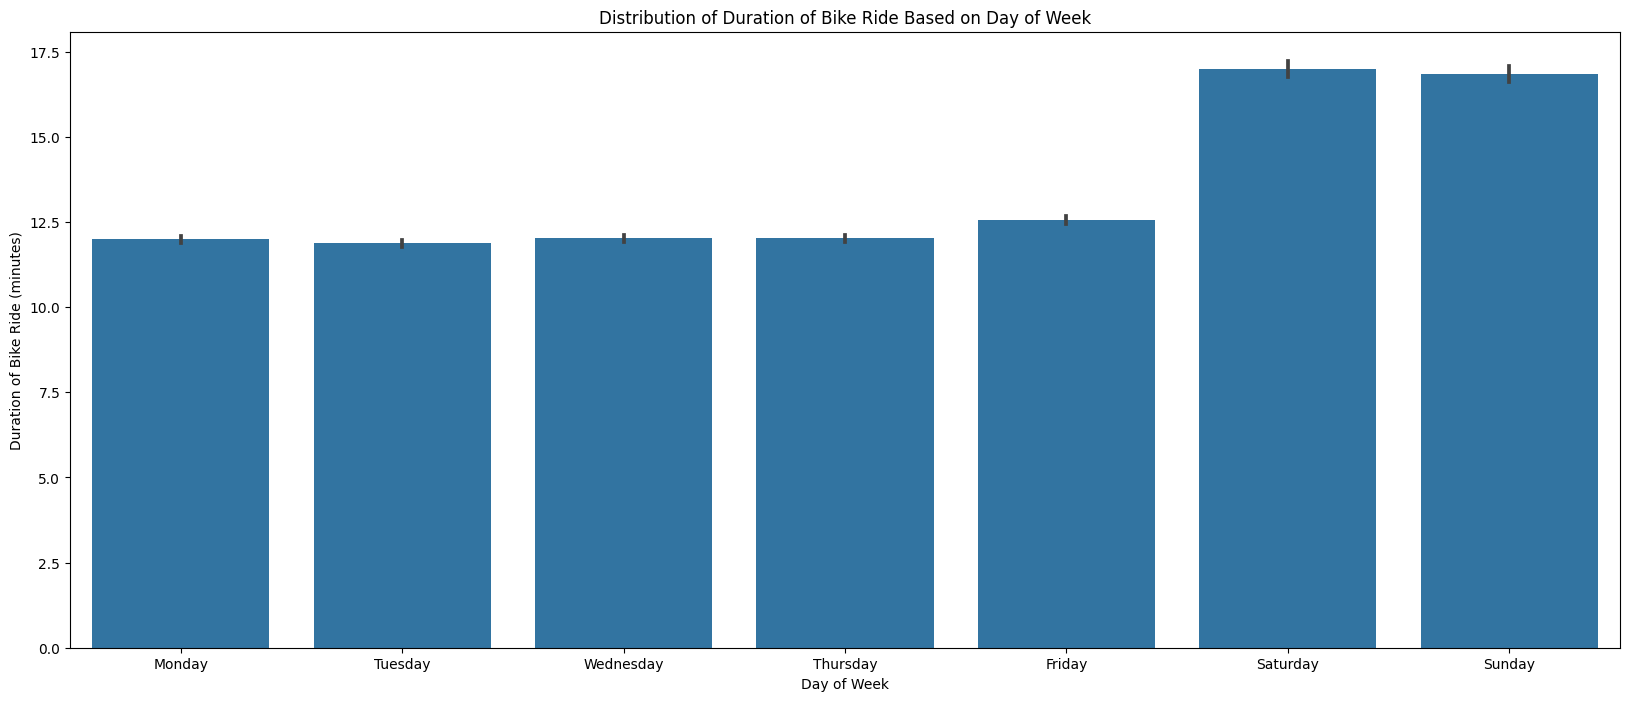

In [73]:
plt.figure(figsize=[20, 8])
# barchart of `day_of_week` and `duration_min`
sb.barplot(data=cc_bike_data, x='day_of_week', y='duration_min', color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Duration of Bike Ride (minutes)')
plt.title('Distribution of Duration of Bike Ride Based on Day of Week');

> We can see that riders tend to ride for longer duration on weekends. This could be due to the fact that riders are more likely to use the bike share system for leisure and recreation on weekends.

> In the following section, we will explore the relationship between the `duration_min` and `day_of_week` how it varies by `user_type`. 

#### 5. What is the relationship between `month_of_year` and `user_type`?

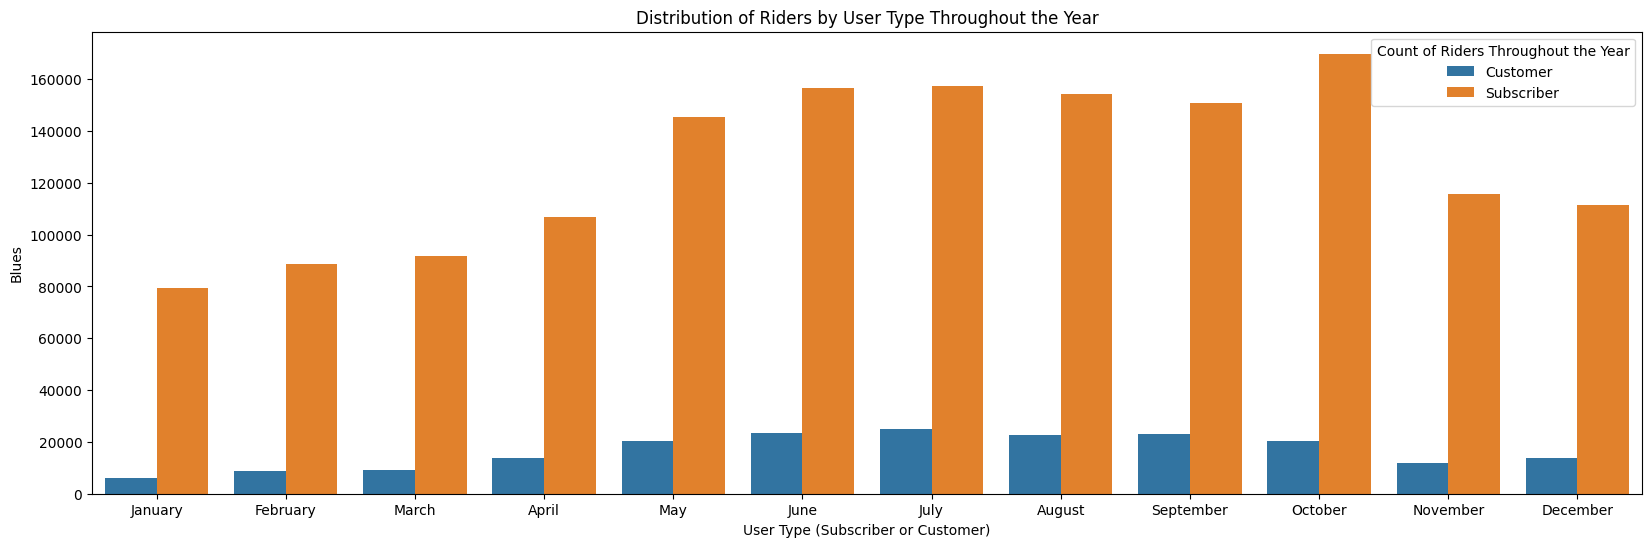

In [74]:
# Create a subplot of 2 plots
plt.figure(figsize=(20, 6))
# Plot the relationship between `month_of_year` and `user_type` using a clustered bar chart
plot_bivariate_countplot(
    'month_of_year',
    'user_type',
    'Distribution of Riders by User Type Throughout the Year',
    'User Type (Subscriber or Customer)',
    'Count of Riders Throughout the Year',
    'Blues'
)

> Throughout the year, we can see that subscribers were more frequent riders. This maybe explained by the fact that the subscribers are more likely to use the bike share system for recreation, leisure and daily commuting to work or school even during the winter months.

#### 6. Distribution between age (`member_age`) and gender (`member_gender`) of Bike Share Users

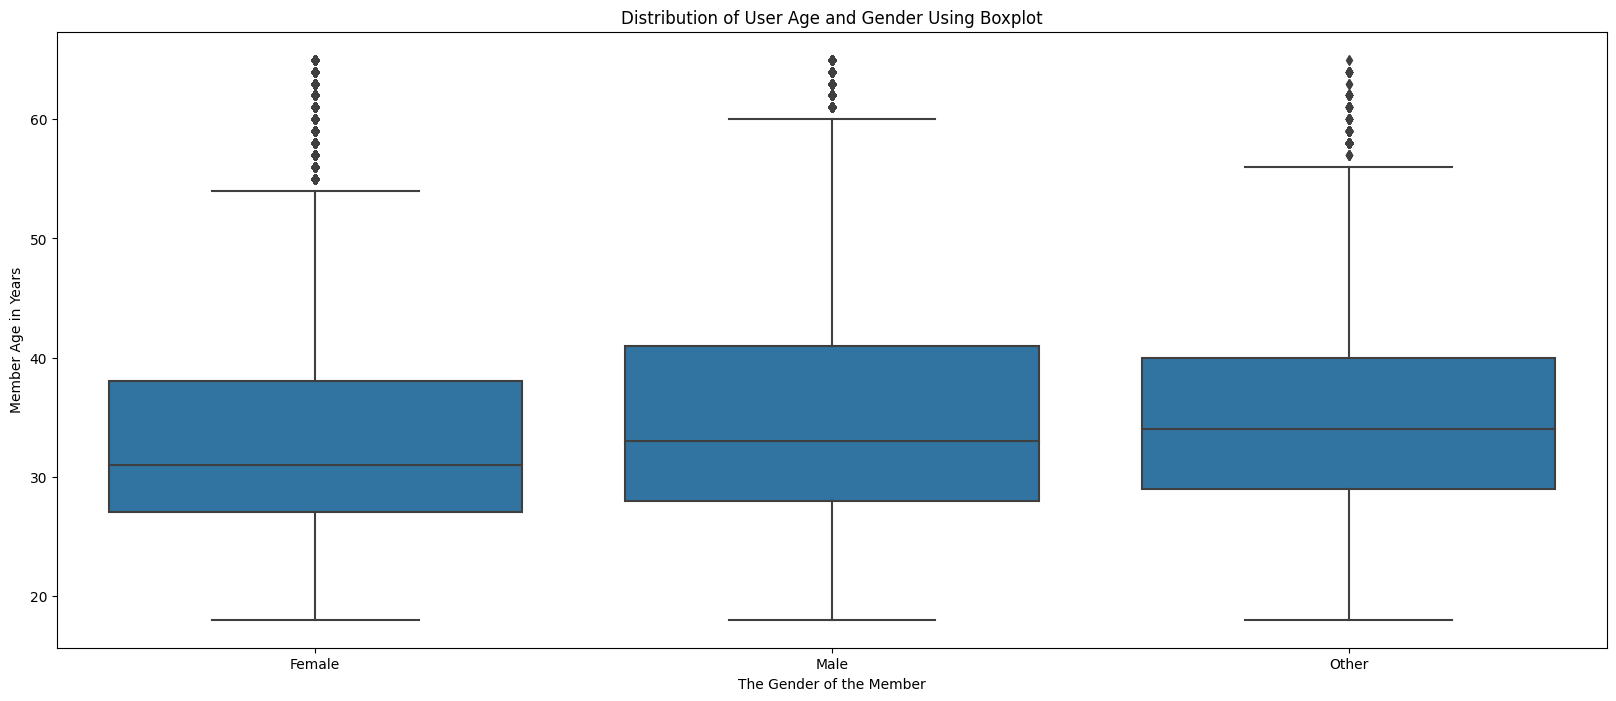

In [75]:
# Plot a boxplot of `member_age` and `member_gender` using boxplot
plt.figure(figsize=(20, 8))
sb.boxplot(data=cc_bike_data, x='member_gender', y='member_age', color=base_color)
plt.xlabel('The Gender of the Member')
plt.ylabel('Member Age in Years')
plt.title('Distribution of User Age and Gender Using Boxplot');

> Plotting a box plot of `member_age` against the `member_gender` shows that **male** are more distributed in terms of riders age. The max age for riders is **male** while **female** tend to have more outliers that **other**

#### 7: Distribution of user type (`user_type`) and monthly usage (`month`) of Bike Share System

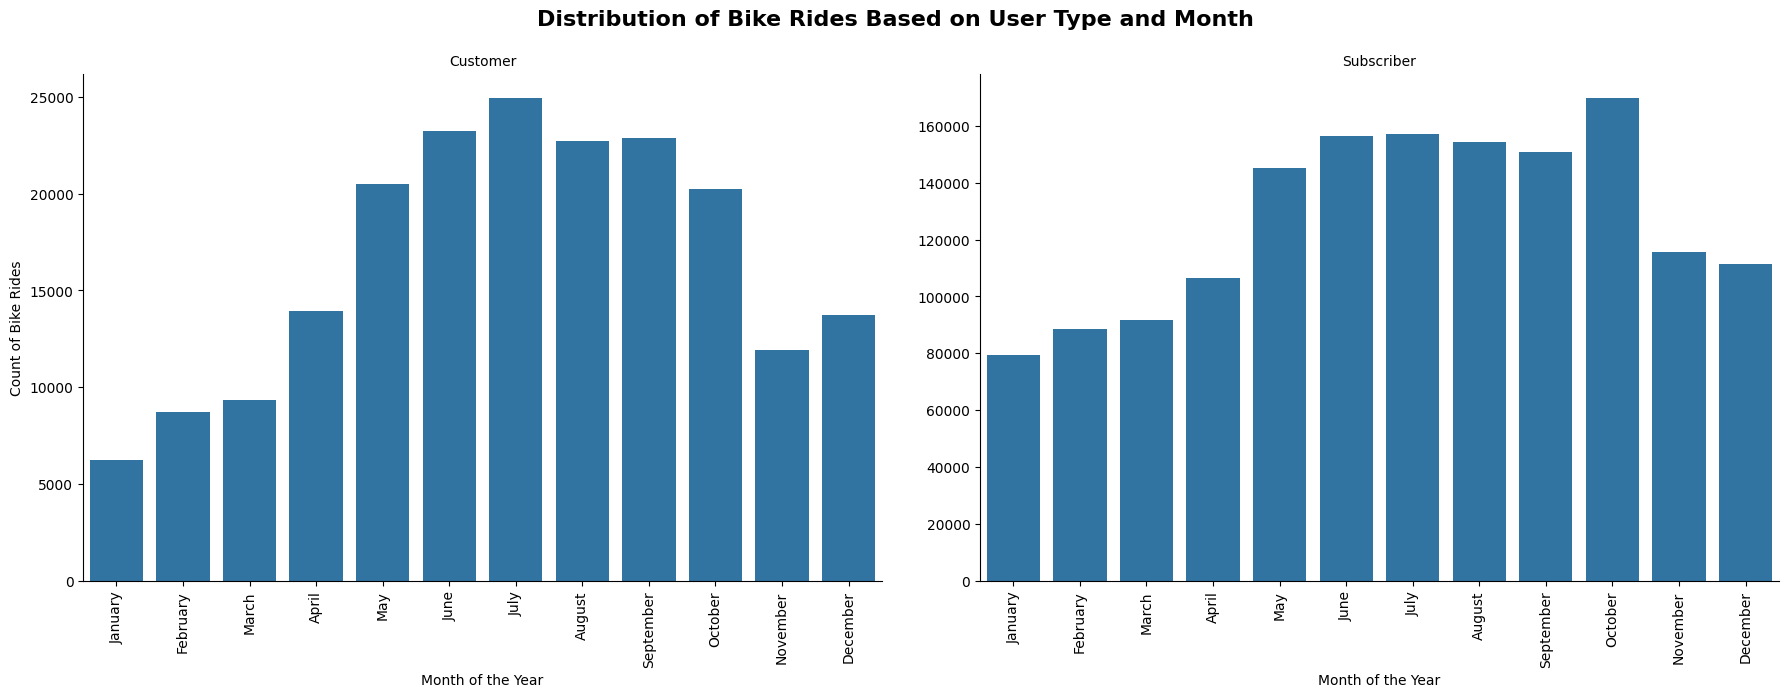

In [76]:
# catplot of `user_type` and `month`
graph =sb.catplot(data=cc_bike_data, x='month_of_year', col='user_type', kind='count', sharey = False, sharex=True, color=base_color,
           height=6, aspect=1.5)
graph.set_axis_labels('Month of the Year', 'Count of Bike Rides')
graph.set_titles('{col_name}')
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Distribution of Bike Rides Based on User Type and Month', y=1.05, fontsize=16, fontweight='semibold');

Both customer and subscriber types show a seasonal trend in their monthly usage, characterized by an increase in demand during the spring and fall seasons, followed by a decline in the winter. Notably, the month of July records the highest number of usage for customers, while subscribers show the highest usage in October.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Analysis of the period of the day when the bike share system is used reveals that subscribers tend to use it more during the morning and evening rush hours, and males tend to use it more often. This is expected because subscribers are more likely to use the system for daily commuting.

> In the analysis of `user_type` vs `member_age_group` and `user_type` and `member_gender`, we can see that the majority of the users are subscribers. This is because the bike sharing service is more oriented towards long-term users who would benefit from the subscription model. The subscription model may also offer discounts or other benefits, which could contribute to the higher number of subscribers.

> The top users of the Bike Share system throughout the week are young people between the ages of 20-30 and 30-40 years, and males. This could be because young people are more likely to use the bike share system for recreation, leisure, and daily commuting to work or school.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Some riders rode the bike for a long duration but did not travel a long distance. This could be because the bike was used for leisure or recreation. However, after investigating the `start_station_id` and `end_station_id`, it is evident that some riders rented the bike and then returned it to the same station. Moreover, some riders who rode for a long time returned the bike near or close to the start station. The `Haversine` formula does not account for such instances. More data about the routes taken by the riders is needed to get a better idea of the relationship between duration_min and distance.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In this section, I will investigate relationships between three or more variables in the dataset. I will start by looking at the relationships between the following variables:
- `user_type` and `member_age` and `member_gender`
- `distance` and `member_age` and `member_gender`
- `duration_min` and `day_of_week` and `user_type`
- `user_type` and `member_age_group` and `member_gender`

#### 1: Relationship and distribution between `user_type` and `member_age` and `member_gender`
In the previous section, we saw that the majority of the users are subscribers. We also saw that males are frequent riders than any other genders. In this section, we will explore the distribution of `user_type` and `member_gender` across the age of the riders.

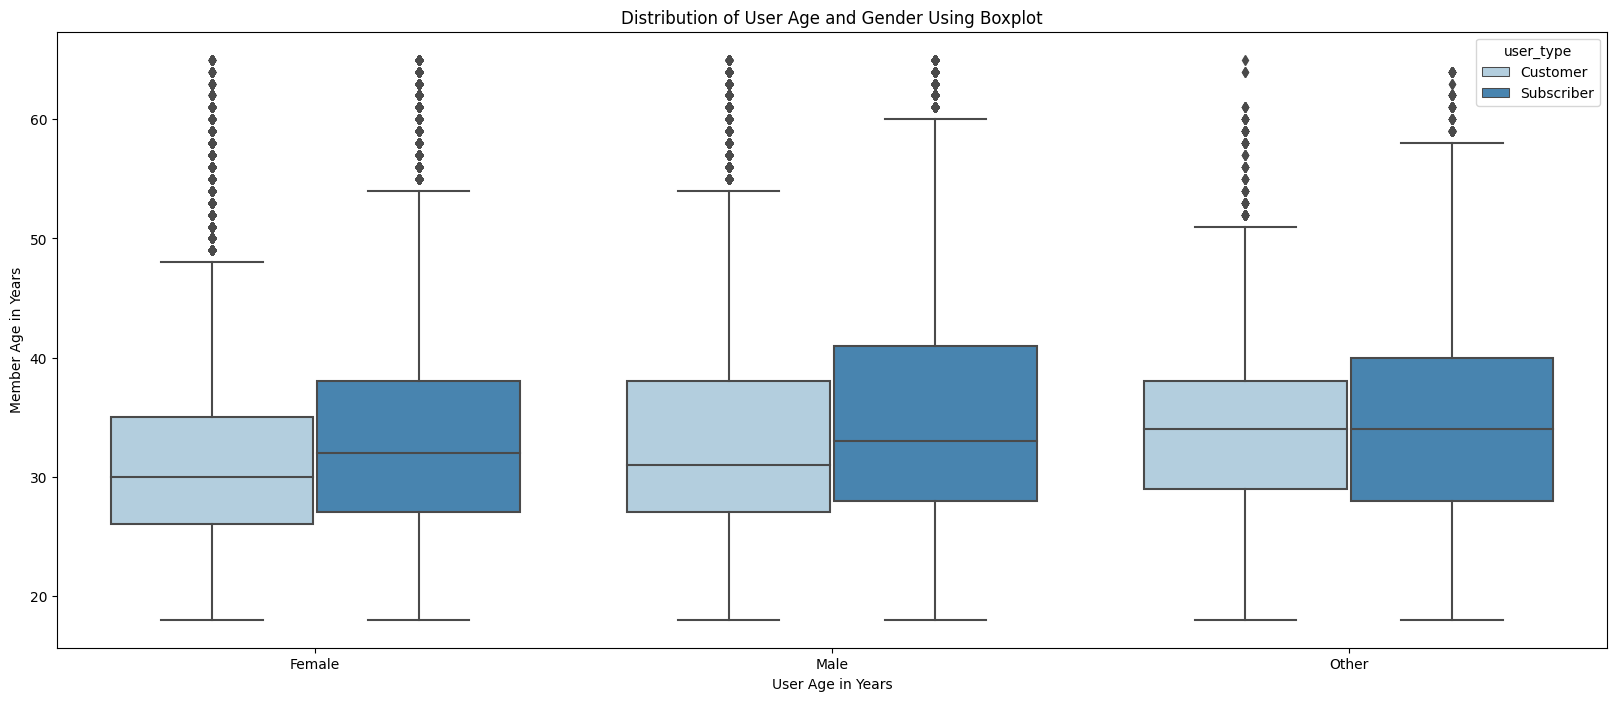

In [77]:
# Plot a boxplot of `member_age` and `member_gender` using boxplot
plt.figure(figsize=(20, 8))
sb.boxplot(data=cc_bike_data, x='member_gender', y='member_age', palette="Blues", hue='user_type')
plt.xlabel('User Age in Years')
plt.ylabel('Member Age in Years')
plt.title('Distribution of User Age and Gender Using Boxplot');

> In the plot above, I observed that the **subscriber** category have large interquartile range span than **customer** user type, indicating a wider range of ages within the **subscriber** category. This implies that there is greater age diversity among **subscribers** compared to **customers**. It is also possible that **subscribers** are more likely to use the bike sharing service for daily commuting, which could lead to a wider age range as opposed to **customers** who may use the service more sporadically.

#### 2. Duration of ride (`duration_min`) taken by age (`member_age`), separated by member gender (`member_gender`)
In the previous section, we explored how distance and age of the members are related. We saw that the majority of the oldest riders had the greatest fluctuation between the shortest and longest distance traveled. In this section, we will try to if gender affected the distance traveled by riders of different ages.

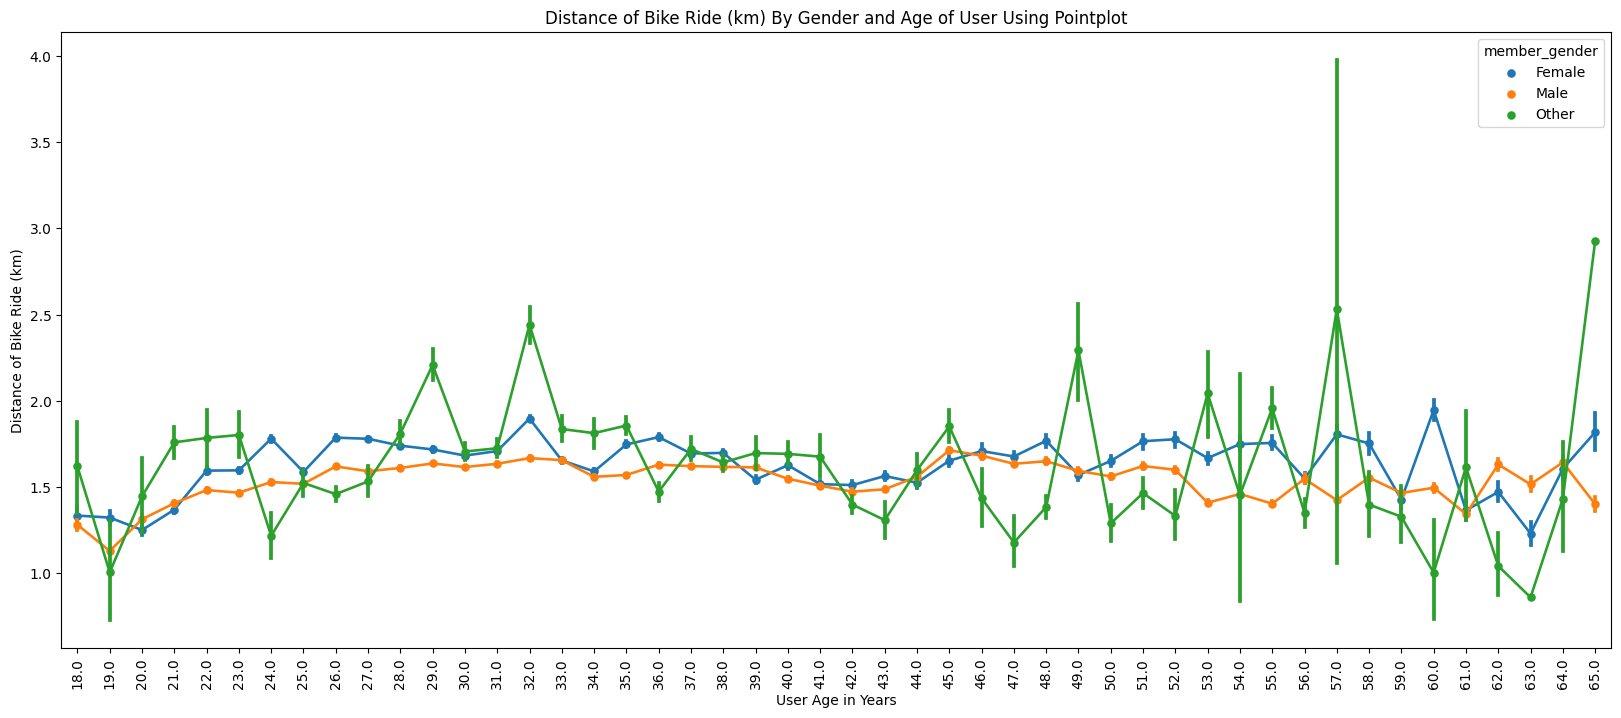

In [78]:
# pointplot of `member_age` and `duration_min` separated by `member_gender`
plt.figure(figsize=(20, 8))
sb.pointplot(data=cc_bike_data, x='member_age', y='distance', hue='member_gender', scale=.7)
plt.xlabel('User Age in Years')
plt.ylabel('Distance of Bike Ride (km)')
plt.title('Distance of Bike Ride (km) By Gender and Age of User Using Pointplot')
plt.xticks(rotation=90);

> Interestingly, when we compare the distance travelled by `member_age` and `member_gender`, we see that the **other** gender category had big flactuation from 50 years and older demographic than any other age. The distance was calculated by Haversine formula. The observation that the **other** gender category had bigger fluctuations in distance travelled among the 50 years and older demographic could be due to small sample size. However, it is worth noting that the distance might not be accurate as the `Haversine` formula does not take into account the routes taken by the riders.

#### 3. Duration of rides (`duration_min`) throughout the week (`day_of_week`) separated by `user_type`
In the previous section, we explored how the duration of the ride appears throughout the week. We were curious to see if there is a specific day which the riders rode more. In this section, we will explore the relationship between the `duration_min` and `day_of_week` how it varies by `user_type`.

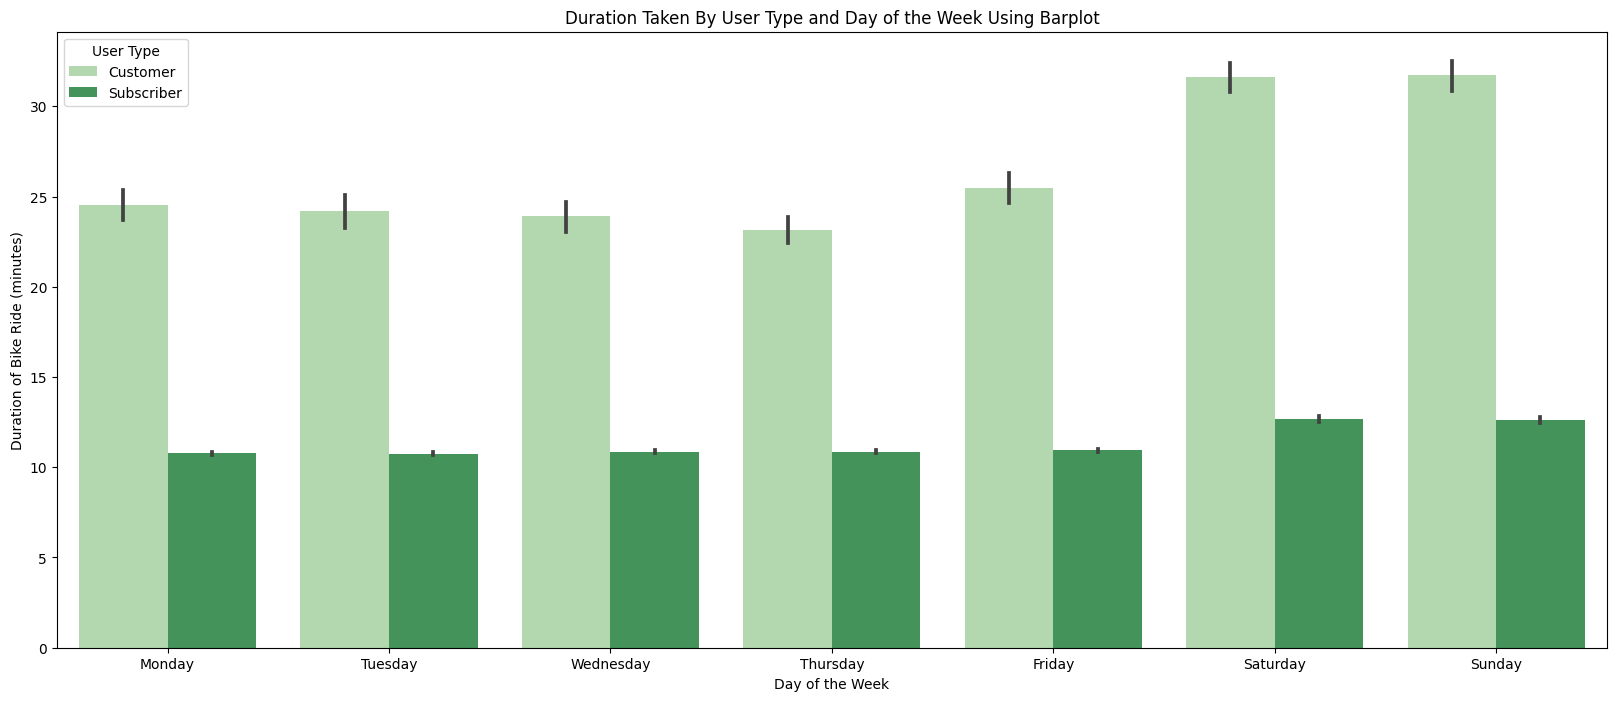

In [79]:
# barplot of duration_min and day_of_week, separated by user_type
plt.figure(figsize=(20, 8))
sb.barplot(data=cc_bike_data, x='day_of_week', y='duration_min', hue='user_type', palette="Greens")
plt.xlabel('Day of the Week')
plt.ylabel('Duration of Bike Ride (minutes)')
plt.title('Duration Taken By User Type and Day of the Week Using Barplot')
plt.legend(title='User Type');

> It is interesting that the `customer` category has a higher duration of ride on throughout the week than the `subscriber` category. This needs further investigation to see if the `customer` category is made up of tourists or daily commuters and the distance each `customer` rode. Because the `Haversine` formula does not take into account the routes taken by the riders, the distance traveled by the `customer` category may not be accurate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The interquartile range of the **subscriber** user type exhibits a larger span than that of the **customer** user type, indicating a greater range of ages within the **subscriber** group. This suggests that the **subscriber** group has a higher degree of age diversity in comparison to the **customer** group. It is plausible that the **subscriber** group frequently utilizes the bike-sharing service for daily commuting, leading to a wider age range, as opposed to the **customer** group, which may use the service more sporadically.

> An observation was made that the **other** gender category had a higher degree of variability in distance travelled among individuals aged 50 and older than any other age group. This observation could potentially be attributed to the relatively small sample size of the other gender category within the 50 years and older demographic.

### Were there any interesting or surprising interactions between features?

> It is intriguing to note that the `customer` category exhibits a higher ride duration throughout the week as compared to the `subscriber` category. Further scrutiny is required to ascertain whether the `customer` category constitutes of tourists or daily commuters, and the magnitude of distance covered by each `customer`. It is imperative to acknowledge that the `Haversine` formula, being a geometric method for calculating the great-circle distance between two points on a sphere, does not consider the actual routes taken by the riders. Consequently, the distance traversed by the `customer` category may not be entirely precise.

## Conclusion
> In my analysis of the 2018 bike ride data from January to December, I discovered that a total of 1,863,721 bike rides had been taken. However, since there were some outliers in the age data, I narrowed my focus to individuals aged between 18 and 65. From this subset, I found that the age range of 20-30 years old had the most frequent riders, with the majority of riders falling within the 25-40 years old age bracket. Male riders accounted for 73% of the total usage, while female riders accounted for 25%, and those who identified as neither male nor female accounted for around 2%.

> An interesting observation from my analysis was that there were more subscribers than customers in the bike sharing service. This could be because the service caters more towards long-term users who can benefit from the subscription model. Additionally, the subscription model may offer discounts or other benefits, which could encourage users to sign up and contribute to the higher number of subscribers.

> When looking at the duration of rides taken between January to December 2018, I found that the majority of rides lasted between 5 to 20 minutes, with a right-skewed distribution indicating that most rides were short. This trend suggests that the bike share system is primarily being used for short trips, such as commuting to and from work or school. However, riders tend to ride for longer durations on weekends, potentially using the bike share system for leisure and recreation. Interestingly, the customer category had longer ride durations throughout the week than the subscriber category, which may be because customer category riders use the bike share system more for leisure and recreation.

> The most popular starting points for bike rides were found to be the San Francisco Ferry Building (Harry Bridges Plaza), San Francisco Caltrain Station 2 (Townsend St at 4th St), and San Francisco Caltrain (Townsend St at 4th St), which are likely transportation hubs such as train and bus stations, making them convenient and easily accessible starting points for people commuting to work or other destinations.

> In terms of time usage, bike rides were heavily used at 8 AM and 5 PM, indicating that individuals are primarily using the bike share system for commuting to and from work or school during peak morning and evening hours. I also discovered that there is a significant drop in the number of rides starting at 11:00 PM to 4:00 AM. Furthermore, the majority of rides were taken during weekdays, suggesting that the bike share system is primarily being used for weekday commuting or transportation, likely for work or school-related purposes.

> Finally, bike rentals were found to be in high demand between May and October, with the highest number of rides occurring in October. This trend suggests that the bike share system is being used more frequently during the warmer months of the year, likely due to favorable weather conditions and longer daylight hours. Additionally, the increase in rides during the summer months may be due to an increase in tourism and outdoor activities, leading to more individuals using the bike share system for transportation and recreation.